In [ ]:
# Solar-Energetic-Particle-Event-Prediction-Ensemble-TS-HOG-TB

In [ ]:
!pip install tsfresh
# !pip install sktime
!pip install sktime==0.33.0
!pip install pyts

In [ ]:
# !pip install sktime==0.33.0

In [ ]:
import sktime
print(sktime.__version__)

In [ ]:
from sktime.classification.interval_based import TimeSeriesForestClassifier

# Image

In [ ]:
# With Centriod

In [ ]:
width_MBR = 200
height_MBR = 200

In [ ]:
!pip install requests

# SEP

In [ ]:
import cv2
import numpy as np
import requests
from PIL import Image
import csv
from datetime import datetime
import io

# Function to convert date format
def convert_date_format(date):
    date_obj = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    return date_obj.strftime("%Y-%m-%dT%H:%M:%SZ")
    # Helioviewer requires UTC ISO timestamps

# Define a function to process and store cropped images as NumPy arrays
cropped_images_AR_SEP = {}
index_counter = 0

def store_cropped_image(date, coord1, coord2): # fetches image for SEP event time
    global index_counter
    base_url = "https://api.helioviewer.org/v2/"
    endpoint = "getJP2Image"    # Full-disk image
    source_id = "3"     # specific data source

    formatted_date = convert_date_format(date)

    url = f"{base_url}{endpoint}/?date={formatted_date}&sourceId={source_id}"
    response = requests.get(url)
        #converts to API, builds URL request and calls API to download image
    if response.status_code == 200:
        try:
            img = Image.open(io.BytesIO(response.content)).convert('L')  # Convert to grayscale

            metadata = {
                'event_coord1': coord1 / 2.63,
                'event_coord2': coord2 / 2.63,
            }   # heliographic arcseconds into pixel coordinates

            width_of_rectangle_arcsec = width_MBR
            height_of_rectangle_arcsec = height_MBR

            center_x = img.width // 2
            center_y = img.height // 2

            width_of_rectangle_pixels = width_of_rectangle_arcsec
            height_of_rectangle_pixels = height_of_rectangle_arcsec

            x1 = center_x + int(metadata['event_coord1']) - (width_of_rectangle_pixels // 2)
            y1 = center_y - int(metadata['event_coord2']) - (height_of_rectangle_pixels // 2)
            x2 = x1 + width_of_rectangle_pixels
            y2 = y1 + height_of_rectangle_pixels

            cropped_image = np.array(img.crop((x1, y1, x2, y2)))  # Convert to NumPy array

            # Binarize the image
            _, thresh = cv2.threshold(cropped_image, 128, 255, cv2.THRESH_BINARY)

            # Find contours on the binarized image
            contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            x, y, w, h = cv2.boundingRect(contours[0]) if contours else (0, 0, 0, 0)
            mbr = cropped_image[y:y+h, x:x+w]  # Get the MBR region

            cropped_images_AR_SEP[index_counter] = mbr
            index_counter += 1
            print(f"MBR for {date} processed and stored as NumPy array with index {index_counter - 1}.")
        except Exception as e:
            print(f"Error processing image for {date}: {e}")
    else:
        print(f"Failed to fetch image for {date} with status code:", response.status_code)

# Open CSV file and process data
with open('SEP_date_100MeV_Dates_Flares_AR.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        date = row['SEP100']
        coord1 = float(row['Coord1'])
        coord2 = float(row['Coord2'])
        store_cropped_image(date, coord1, coord2)

# Further code to continue the logic as required.
# ...


MBR for 1997-11-04 05:50:00 processed and stored as NumPy array with index 0.
MBR for 1998-05-06 07:55:00 processed and stored as NumPy array with index 1.
MBR for 2000-06-10 16:40:00 processed and stored as NumPy array with index 2.
MBR for 2000-07-14 10:00:00 processed and stored as NumPy array with index 3.
MBR for 2000-07-22 11:15:00 processed and stored as NumPy array with index 4.
MBR for 2000-09-12 11:30:00 processed and stored as NumPy array with index 5.
MBR for 2000-11-24 14:50:00 processed and stored as NumPy array with index 6.
MBR for 2000-11-25 00:55:00 processed and stored as NumPy array with index 7.
MBR for 2001-01-28 15:40:00 processed and stored as NumPy array with index 8.
MBR for 2001-04-09 15:20:00 processed and stored as NumPy array with index 9.
MBR for 2001-04-15 13:15:00 processed and stored as NumPy array with index 10.
MBR for 2001-05-20 06:00:00 processed and stored as NumPy array with index 11.
MBR for 2001-06-15 16:15:00 processed and stored as NumPy arra

In [ ]:
cropped_images_AR_SEP[0]

array([[156, 159, 157, ..., 167, 184, 176],
       [157, 158, 158, ..., 171, 182, 178],
       [157, 158, 158, ..., 175, 177, 180],
       ...,
       [206, 208, 217, ..., 162, 154, 145],
       [203, 207, 207, ..., 170, 138, 158],
       [201, 202, 202, ..., 164, 146, 153]], dtype=uint8)

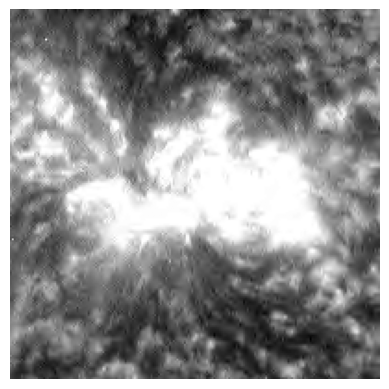

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'cropped_images_AR' contains the processed images
# Display the image corresponding to index 0
plt.imshow(cropped_images_AR_SEP[3], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


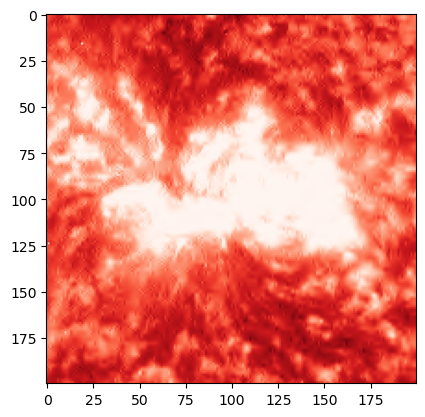

In [ ]:
plt.imshow(cropped_images_AR_SEP[3], cmap='Reds_r')

In [ ]:
import requests
from PIL import Image
import csv
from datetime import datetime
import io
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to convert date format
def convert_date_format(date):
    date_obj = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    return date_obj.strftime("%Y-%m-%dT%H:%M:%SZ")

# Define a function to process and store cropped images as NumPy arrays
cropped_images_AR_SEP = {}
index_counter = 0

def store_cropped_image(date, coord1, coord2):
    global index_counter
    base_url = "https://api.helioviewer.org/v2/"
    endpoint = "getJP2Image"
    source_id = "3"

    formatted_date = convert_date_format(date)

    url = f"{base_url}{endpoint}/?date={formatted_date}&sourceId={source_id}"
    response = requests.get(url)

    if response.status_code == 200:
        try:
            img = Image.open(io.BytesIO(response.content)).convert('L')  # Convert to grayscale

            metadata = {
                'event_coord1': coord1 / 2.63,
                'event_coord2': coord2 / 2.63,
            }

            width_of_rectangle_arcsec = width_MBR
            height_of_rectangle_arcsec = height_MBR

            center_x = img.width // 2
            center_y = img.height // 2

            width_of_rectangle_pixels = width_of_rectangle_arcsec
            height_of_rectangle_pixels = height_of_rectangle_arcsec

            x1 = center_x + int(metadata['event_coord1']) - (width_of_rectangle_pixels // 2)
            y1 = center_y - int(metadata['event_coord2']) - (height_of_rectangle_pixels // 2)
            x2 = x1 + width_of_rectangle_pixels
            y2 = y1 + height_of_rectangle_pixels

            cropped_image = np.array(img.crop((x1, y1, x2, y2)))  # Convert to NumPy array

            # Threshold to obtain the brightest parts
            _, thresh = cv2.threshold(cropped_image, 200, 255, cv2.THRESH_BINARY)

            # Find contours
            contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Create a blank mask image
            mask = np.zeros_like(cropped_image)

            # Draw contours on the mask
            cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

            # Apply the mask to the cropped image
            result = np.where(mask != 0, cropped_image, 0)

            # Store the processed image
            cropped_images_AR_SEP[index_counter] = result
            index_counter += 1
            print(f"Cropped image for {date} processed and stored as NumPy array with index {index_counter - 1}.")
        except Exception as e:
            print(f"Error processing image for {date}: {e}")
    else:
        print(f"Failed to fetch image for {date} with status code:", response.status_code)

# Open CSV file and process data
with open('SEP_date_100MeV_Dates_Flares_AR.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        date = row['SEP100']
        coord1 = float(row['Coord1'])
        coord2 = float(row['Coord2'])
        store_cropped_image(date, coord1, coord2)



Cropped image for 1997-11-04 05:50:00 processed and stored as NumPy array with index 0.
Cropped image for 1998-05-06 07:55:00 processed and stored as NumPy array with index 1.
Cropped image for 2000-06-10 16:40:00 processed and stored as NumPy array with index 2.
Cropped image for 2000-07-14 10:00:00 processed and stored as NumPy array with index 3.
Cropped image for 2000-07-22 11:15:00 processed and stored as NumPy array with index 4.
Cropped image for 2000-09-12 11:30:00 processed and stored as NumPy array with index 5.
Cropped image for 2000-11-24 14:50:00 processed and stored as NumPy array with index 6.
Cropped image for 2000-11-25 00:55:00 processed and stored as NumPy array with index 7.
Cropped image for 2001-01-28 15:40:00 processed and stored as NumPy array with index 8.
Cropped image for 2001-04-09 15:20:00 processed and stored as NumPy array with index 9.
Cropped image for 2001-04-15 13:15:00 processed and stored as NumPy array with index 10.
Cropped image for 2001-05-20 06

In [ ]:
import requests
from PIL import Image
import csv
from datetime import datetime
import io
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to convert date format
def convert_date_format(date):
    date_obj = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    return date_obj.strftime("%Y-%m-%dT%H:%M:%SZ")

# Define a function to process and store cropped images as NumPy arrays
cropped_images_AR_SEP = {}
index_counter = 0

def store_cropped_image(date, coord1, coord2):
    global index_counter
    base_url = "https://api.helioviewer.org/v2/"
    endpoint = "getJP2Image"
    source_id = "3"

    formatted_date = convert_date_format(date)

    url = f"{base_url}{endpoint}/?date={formatted_date}&sourceId={source_id}"
    response = requests.get(url)

    if response.status_code == 200:
        try:
            img = Image.open(io.BytesIO(response.content)).convert('L')  # Convert to grayscale

            metadata = {
                'event_coord1': coord1 / 2.63,
                'event_coord2': coord2 / 2.63,
            }

            width_of_rectangle_arcsec = width_MBR
            height_of_rectangle_arcsec = height_MBR

            center_x = img.width // 2
            center_y = img.height // 2

            width_of_rectangle_pixels = width_of_rectangle_arcsec
            height_of_rectangle_pixels = height_of_rectangle_arcsec

            x1 = center_x + int(metadata['event_coord1']) - (width_of_rectangle_pixels // 2)
            y1 = center_y - int(metadata['event_coord2']) - (height_of_rectangle_pixels // 2)
            x2 = x1 + width_of_rectangle_pixels
            y2 = y1 + height_of_rectangle_pixels

            cropped_image = np.array(img.crop((x1, y1, x2, y2)))  # Convert to NumPy array

            # Threshold to obtain the brightest parts
            _, thresh = cv2.threshold(cropped_image, 200, 255, cv2.THRESH_BINARY)

            # Find contours
            contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Create a blank mask image
            mask = np.zeros_like(cropped_image)

            # Draw contours on the mask
            cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

            # Apply the mask to the cropped image
            result = np.where(mask != 0, cropped_image, 0)

            # Store the processed image
            cropped_images_AR_SEP[index_counter] = result
            index_counter += 1
            print(f"Cropped image for {date} processed and stored as NumPy array with index {index_counter - 1}.")
        except Exception as e:
            print(f"Error processing image for {date}: {e}")
    else:
        print(f"Failed to fetch image for {date} with status code:", response.status_code)

# Open CSV file and process data
with open('SEP_date_100MeV_Dates_Flares_AR.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        date = row['SEP100']
        coord1 = float(row['Coord1'])
        coord2 = float(row['Coord2'])
        store_cropped_image(date, coord1, coord2)



In [ ]:
cropped_images_AR_SEP[0]

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [206, 208, 217, ...,   0,   0,   0],
       [203, 207, 207, ...,   0,   0,   0],
       [201, 202, 202, ...,   0,   0,   0]], dtype=uint8)

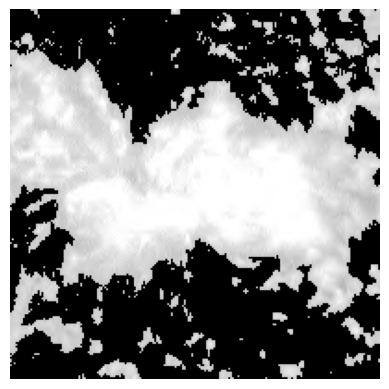

In [ ]:
# Display the image corresponding to index 0
plt.imshow(cropped_images_AR_SEP[3], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()

## SEP Mask

In [ ]:
import requests
from PIL import Image
import csv
from datetime import datetime
import io
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to convert date format
def convert_date_format(date):
    date_obj = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    return date_obj.strftime("%Y-%m-%dT%H:%M:%SZ")

# Define a function to process and store cropped images as NumPy arrays
cropped_images_AR_SEP = {}
index_counter = 0

def store_cropped_image(date, coord1, coord2):
    global index_counter
    base_url = "https://api.helioviewer.org/v2/"
    endpoint = "getJP2Image"
    source_id = "3"

    formatted_date = convert_date_format(date)

    url = f"{base_url}{endpoint}/?date={formatted_date}&sourceId={source_id}"
    response = requests.get(url)

    if response.status_code == 200:
        try:
            img = Image.open(io.BytesIO(response.content)).convert('L')  # Convert to grayscale

            metadata = {
                'event_coord1': coord1 / 2.63,  #for SDO
                'event_coord2': coord2 / 2.63,  #arcsec/pixel
            }

            width_of_rectangle_arcsec = width_MBR
            height_of_rectangle_arcsec = height_MBR

            center_x = img.width // 2
            center_y = img.height // 2

            width_of_rectangle_pixels = width_of_rectangle_arcsec
            height_of_rectangle_pixels = height_of_rectangle_arcsec

            x1 = center_x + int(metadata['event_coord1']) - (width_of_rectangle_pixels // 2)
            y1 = center_y - int(metadata['event_coord2']) - (height_of_rectangle_pixels // 2)
            x2 = x1 + width_of_rectangle_pixels
            y2 = y1 + height_of_rectangle_pixels

            cropped_image = np.array(img.crop((x1, y1, x2, y2)))  # Convert to NumPy array

            # Threshold to obtain the brightest parts
            _, thresh = cv2.threshold(cropped_image, 200, 255, cv2.THRESH_BINARY)



            # Find contours
            contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Keep only the largest contour
            contour_areas = [cv2.contourArea(contour) for contour in contours]
            largest_contour_index = np.argmax(contour_areas)
            largest_contour = contours[largest_contour_index]

            # Create a blank mask image
            mask = np.zeros_like(cropped_image)

            # Draw largest contour on the mask
            cv2.drawContours(mask, [largest_contour], -1, (255), thickness=cv2.FILLED)

            # Apply the mask to the cropped image
            result = np.where(mask != 0, cropped_image, 0)

            # Store the processed image
            cropped_images_AR_SEP[index_counter] = result
            index_counter += 1
            print(f"Cropped image for {date} processed and stored as NumPy array with index {index_counter - 1}.")
        except Exception as e:
            print(f"Error processing image for {date}: {e}")
    else:
        print(f"Failed to fetch image for {date} with status code:", response.status_code)

# Open CSV file and process data
with open('SEP_date_100MeV_Dates_Flares_AR.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        date = row['SEP100']
        coord1 = float(row['Coord1'])
        coord2 = float(row['Coord2'])
        store_cropped_image(date, coord1, coord2)



Cropped image for 1997-11-04 05:50:00 processed and stored as NumPy array with index 0.
Cropped image for 1998-05-06 07:55:00 processed and stored as NumPy array with index 1.
Cropped image for 2000-06-10 16:40:00 processed and stored as NumPy array with index 2.
Cropped image for 2000-07-14 10:00:00 processed and stored as NumPy array with index 3.
Cropped image for 2000-07-22 11:15:00 processed and stored as NumPy array with index 4.
Cropped image for 2000-09-12 11:30:00 processed and stored as NumPy array with index 5.
Cropped image for 2000-11-24 14:50:00 processed and stored as NumPy array with index 6.
Cropped image for 2000-11-25 00:55:00 processed and stored as NumPy array with index 7.
Cropped image for 2001-01-28 15:40:00 processed and stored as NumPy array with index 8.
Cropped image for 2001-04-09 15:20:00 processed and stored as NumPy array with index 9.
Cropped image for 2001-04-15 13:15:00 processed and stored as NumPy array with index 10.
Cropped image for 2001-05-20 06

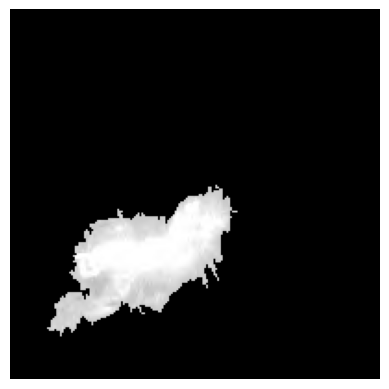

In [ ]:
# Display the image corresponding to index 0
plt.imshow(cropped_images_AR_SEP[0], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


In [ ]:
import requests
from PIL import Image
import csv
from datetime import datetime
import io
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to convert date format
def convert_date_format(date):
    date_obj = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    return date_obj.strftime("%Y-%m-%dT%H:%M:%SZ")

# Define a function to process and store cropped images as NumPy arrays
cropped_images_AR_SEP = {}
index_counter = 0

USE_ADAPTIVE = False   # False to use old fixed threshold

def store_cropped_image(date, coord1, coord2):
    global index_counter
    base_url = "https://api.helioviewer.org/v2/"
    endpoint = "getJP2Image"
    source_id = "3"

    formatted_date = convert_date_format(date)

    url = f"{base_url}{endpoint}/?date={formatted_date}&sourceId={source_id}"
    response = requests.get(url)

    if response.status_code == 200:
        try:
            img = Image.open(io.BytesIO(response.content)).convert('L')  # grayscale

            metadata = {
                'event_coord1': coord1 / 2.63,
                'event_coord2': coord2 / 2.63,
            }

            width_of_rectangle_arcsec = width_MBR
            height_of_rectangle_arcsec = height_MBR

            center_x = img.width // 2
            center_y = img.height // 2

            width_of_rectangle_pixels = width_of_rectangle_arcsec
            height_of_rectangle_pixels = height_of_rectangle_arcsec

            x1 = center_x + int(metadata['event_coord1']) - (width_of_rectangle_pixels // 2)
            y1 = center_y - int(metadata['event_coord2']) - (height_of_rectangle_pixels // 2)
            x2 = x1 + width_of_rectangle_pixels
            y2 = y1 + height_of_rectangle_pixels

            cropped_image = np.array(img.crop((x1, y1, x2, y2)))  # numpy array

            # THRESHOLD STEP
            if USE_ADAPTIVE:
                thresh = cv2.adaptiveThreshold(
                    cropped_image.astype(np.uint8),
                    255,
                    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                    cv2.THRESH_BINARY,
                    35,   # blockSize (odd number) – tune this
                    5     # C value – tune this
                )
            else:
                _, thresh = cv2.threshold(cropped_image, 200, 255, cv2.THRESH_BINARY)

            # Find contours
            contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Keep only the largest contour
            if contours:
                contour_areas = [cv2.contourArea(contour) for contour in contours]
                largest_contour_index = np.argmax(contour_areas)
                largest_contour = contours[largest_contour_index]

                # Create a blank mask
                mask = np.zeros_like(cropped_image)

                # Draw largest contour on the mask
                cv2.drawContours(mask, [largest_contour], -1, (255), thickness=cv2.FILLED)

                # Apply the mask to the cropped image
                result = np.where(mask != 0, cropped_image, 0)
            else:
                result = cropped_image

            # Store the processed image
            cropped_images_AR_SEP[index_counter] = result
            index_counter += 1
            print(f"Cropped image for {date} processed and stored as NumPy array with index {index_counter - 1}.")
        except Exception as e:
            print(f"Error processing image for {date}: {e}")
    else:
        print(f"Failed to fetch image for {date} with status code:", response.status_code)

# Open CSV file and process data
with open('SEP_date_100MeV_Dates_Flares_AR.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        date = row['SEP100']
        coord1 = float(row['Coord1'])
        coord2 = float(row['Coord2'])
        store_cropped_image(date, coord1, coord2)

    # # Optionally, visualize the adjusted image
    # plt.imshow(adjusted_image, cmap='gray')
    # plt.title(f"Adjusted Image {index}")
    # plt.axis('off')
    # plt.show()


Cropped image for 1997-11-04 05:50:00 processed and stored as NumPy array with index 0.
Cropped image for 1998-05-06 07:55:00 processed and stored as NumPy array with index 1.
Cropped image for 2000-06-10 16:40:00 processed and stored as NumPy array with index 2.
Cropped image for 2000-07-14 10:00:00 processed and stored as NumPy array with index 3.
Cropped image for 2000-07-22 11:15:00 processed and stored as NumPy array with index 4.
Cropped image for 2000-09-12 11:30:00 processed and stored as NumPy array with index 5.
Cropped image for 2000-11-24 14:50:00 processed and stored as NumPy array with index 6.
Cropped image for 2000-11-25 00:55:00 processed and stored as NumPy array with index 7.
Cropped image for 2001-01-28 15:40:00 processed and stored as NumPy array with index 8.
Cropped image for 2001-04-09 15:20:00 processed and stored as NumPy array with index 9.
Cropped image for 2001-04-15 13:15:00 processed and stored as NumPy array with index 10.
Cropped image for 2001-05-20 06

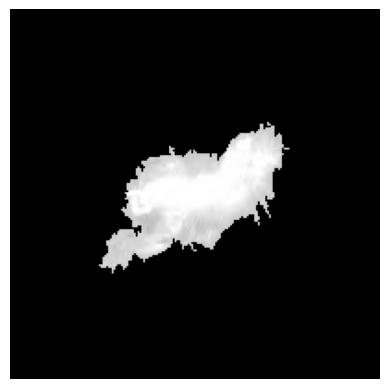

In [ ]:
# Display the image corresponding to index 0
plt.imshow(adjusted_images_AR_SEP[0], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


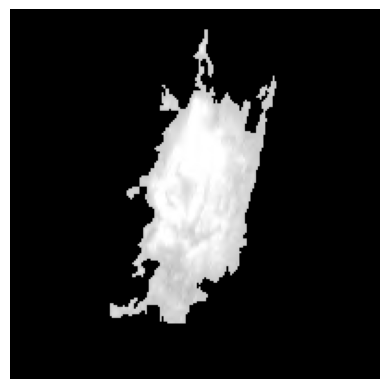

In [ ]:
# Display the image corresponding to index 0
plt.imshow(adjusted_images_AR_SEP[1], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


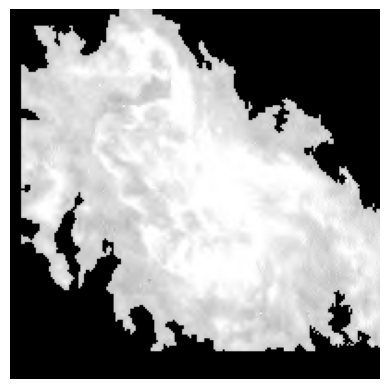

In [ ]:
# Display the image corresponding to index 0
plt.imshow(adjusted_images_AR_SEP[2], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


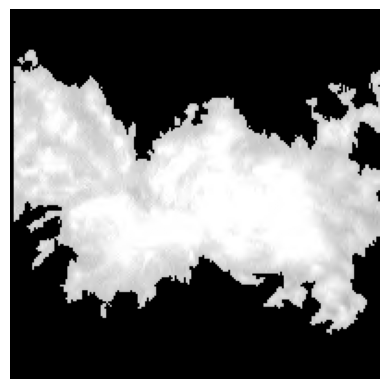

In [ ]:
# Display the image corresponding to index 0
plt.imshow(adjusted_images_AR_SEP[3], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


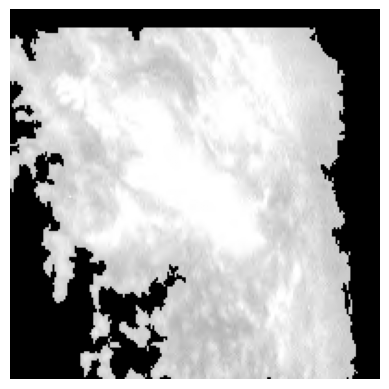

In [ ]:
# Display the image corresponding to index 0
plt.imshow(adjusted_images_AR_SEP[4], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


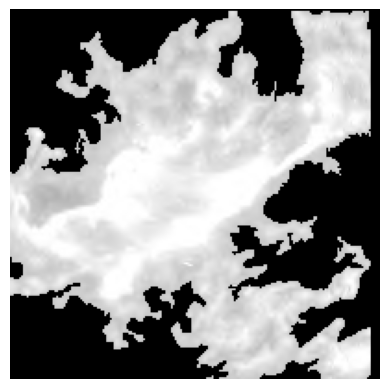

In [ ]:
# Display the image corresponding to index 0
plt.imshow(adjusted_images_AR_SEP[5], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


In [ ]:
#SEP - Western face
#NSEP - Eastern

# NSEP

## NSEP Mask

In [ ]:
import requests
from PIL import Image
import csv
from datetime import datetime
import io
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to convert date format
def convert_date_format(date):
    date_obj = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    return date_obj.strftime("%Y-%m-%dT%H:%M:%SZ")

# Define a function to process and store cropped images as NumPy arrays
cropped_images_AR_NSEP = {}
index_counter = 0

def store_cropped_image(date, coord1, coord2):
    global index_counter
    base_url = "https://api.helioviewer.org/v2/"
    endpoint = "getJP2Image"
    source_id = "3"

    formatted_date = convert_date_format(date)

    url = f"{base_url}{endpoint}/?date={formatted_date}&sourceId={source_id}"
    response = requests.get(url)

    if response.status_code == 200:
        try:
            img = Image.open(io.BytesIO(response.content)).convert('L')  # Convert to grayscale

            metadata = {
                'event_coord1': coord1 / 2.63,
                'event_coord2': coord2 / 2.63,
            }

            width_of_rectangle_arcsec = width_MBR
            height_of_rectangle_arcsec = height_MBR

            center_x = img.width // 2
            center_y = img.height // 2

            width_of_rectangle_pixels = width_of_rectangle_arcsec
            height_of_rectangle_pixels = height_of_rectangle_arcsec

            x1 = center_x + int(metadata['event_coord1']) - (width_of_rectangle_pixels // 2)
            y1 = center_y - int(metadata['event_coord2']) - (height_of_rectangle_pixels // 2)
            x2 = x1 + width_of_rectangle_pixels
            y2 = y1 + height_of_rectangle_pixels

            cropped_image = np.array(img.crop((x1, y1, x2, y2)))  # Convert to NumPy array

            # Threshold to obtain the brightest parts
            _, thresh = cv2.threshold(cropped_image, 200, 255, cv2.THRESH_BINARY)

            # Find contours
            contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Keep only the largest contour
            contour_areas = [cv2.contourArea(contour) for contour in contours]
            largest_contour_index = np.argmax(contour_areas)
            largest_contour = contours[largest_contour_index]

            # Create a blank mask image
            mask = np.zeros_like(cropped_image)

            # Draw largest contour on the mask
            cv2.drawContours(mask, [largest_contour], -1, (255), thickness=cv2.FILLED)

            # Apply the mask to the cropped image
            result = np.where(mask != 0, cropped_image, 0)

            # Store the processed image
            cropped_images_AR_NSEP[index_counter] = result
            index_counter += 1
            print(f"Cropped image for {date} processed and stored as NumPy array with index {index_counter - 1}.")
        except Exception as e:
            print(f"Error processing image for {date}: {e}")
    else:
        print(f"Failed to fetch image for {date} with status code:", response.status_code)

# Open CSV file and process data
with open('NSEP_date_P2_Dates_AR.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        date = row['NSEP']
        coord1 = float(row['Coord1'])
        coord2 = float(row['Coord2'])
        store_cropped_image(date, coord1, coord2)



Cropped image for 1997-11-29 22:25:00 processed and stored as NumPy array with index 0.
Cropped image for 1998-04-27 08:55:00 processed and stored as NumPy array with index 1.
Cropped image for 1998-11-23 10:55:00 processed and stored as NumPy array with index 2.
Cropped image for 1999-03-16 21:30:00 processed and stored as NumPy array with index 3.
Cropped image for 1999-04-04 05:15:00 processed and stored as NumPy array with index 4.
Cropped image for 1999-05-08 14:20:00 processed and stored as NumPy array with index 5.
Cropped image for 1999-07-24 07:45:00 processed and stored as NumPy array with index 6.
Cropped image for 1999-07-29 19:30:00 processed and stored as NumPy array with index 7.
Cropped image for 1999-08-04 05:45:00 processed and stored as NumPy array with index 8.
Cropped image for 1999-08-21 16:30:00 processed and stored as NumPy array with index 9.
Cropped image for 1999-08-25 01:30:00 processed and stored as NumPy array with index 10.
Cropped image for 1999-08-27 12

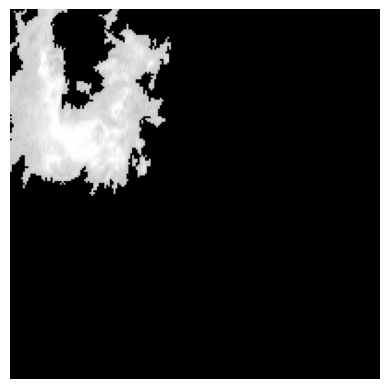

In [ ]:
# Display the image corresponding to index 0
plt.imshow(cropped_images_AR_NSEP[0], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


In [ ]:
import requests
from PIL import Image
import csv
from datetime import datetime
import io
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to convert date format
def convert_date_format(date):
    date_obj = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    return date_obj.strftime("%Y-%m-%dT%H:%M:%SZ")

# Define a function to process and store cropped images as NumPy arrays
cropped_images_AR_NSEP = {}
index_counter = 0

def store_cropped_image(date, coord1, coord2):
    global index_counter
    base_url = "https://api.helioviewer.org/v2/"
    endpoint = "getJP2Image"
    source_id = "3"

    formatted_date = convert_date_format(date)

    url = f"{base_url}{endpoint}/?date={formatted_date}&sourceId={source_id}"
    response = requests.get(url)

    if response.status_code == 200:
        try:
            img = Image.open(io.BytesIO(response.content)).convert('L')  # Convert to grayscale

            metadata = {
                'event_coord1': coord1 / 2.63,
                'event_coord2': coord2 / 2.63,
            }

            width_of_rectangle_arcsec = width_MBR
            height_of_rectangle_arcsec = height_MBR

            center_x = img.width // 2
            center_y = img.height // 2

            width_of_rectangle_pixels = width_of_rectangle_arcsec
            height_of_rectangle_pixels = height_of_rectangle_arcsec

            x1 = center_x + int(metadata['event_coord1']) - (width_of_rectangle_pixels // 2)
            y1 = center_y - int(metadata['event_coord2']) - (height_of_rectangle_pixels // 2)
            x2 = x1 + width_of_rectangle_pixels
            y2 = y1 + height_of_rectangle_pixels

            cropped_image = np.array(img.crop((x1, y1, x2, y2)))  # Convert to NumPy array

            # Threshold to obtain the brightest parts
            _, thresh = cv2.threshold(cropped_image, 200, 255, cv2.THRESH_BINARY)

            # Find contours
            contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Keep only the largest contour
            contour_areas = [cv2.contourArea(contour) for contour in contours]
            largest_contour_index = np.argmax(contour_areas)
            largest_contour = contours[largest_contour_index]

            # Create a blank mask image
            mask = np.zeros_like(cropped_image)

            # Draw largest contour on the mask
            cv2.drawContours(mask, [largest_contour], -1, (255), thickness=cv2.FILLED)

            # Apply the mask to the cropped image
            result = np.where(mask != 0, cropped_image, 0)

            # Store the processed image
            cropped_images_AR_NSEP[index_counter] = result
            index_counter += 1
            print(f"Cropped image for {date} processed and stored as NumPy array with index {index_counter - 1}.")
        except Exception as e:
            print(f"Error processing image for {date}: {e}")
    else:
        print(f"Failed to fetch image for {date} with status code:", response.status_code)

# Open CSV file and process data
with open('NSEP_date_P2_Dates_AR.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        date = row['NSEP']
        coord1 = float(row['Coord1'])
        coord2 = float(row['Coord2'])
        store_cropped_image(date, coord1, coord2)

# Adjust the bright shapes to the center of each image
adjusted_images_AR_NSEP = {}

for index, image in cropped_images_AR_NSEP.items():
    # Calculate the center of mass (centroid) of the brightest region
    M = cv2.moments(image)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0

    # Shift the image so that the centroid is at the center
    rows, cols = image.shape
    shiftX = cols // 2 - cX
    shiftY = rows // 2 - cY
    M = np.float32([[1, 0, shiftX], [0, 1, shiftY]])
    adjusted_image = cv2.warpAffine(image, M, (cols, rows))

    # Store the adjusted image
    adjusted_images_AR_NSEP[index] = adjusted_image

    # # Optionally, visualize the adjusted image
    # plt.imshow(adjusted_image, cmap='gray')
    # plt.title(f"Adjusted Image {index}")
    # plt.axis('off')
    # plt.show()


Cropped image for 1997-11-29 22:25:00 processed and stored as NumPy array with index 0.
Cropped image for 1998-04-27 08:55:00 processed and stored as NumPy array with index 1.
Cropped image for 1998-11-23 10:55:00 processed and stored as NumPy array with index 2.
Cropped image for 1999-03-16 21:30:00 processed and stored as NumPy array with index 3.
Cropped image for 1999-04-04 05:15:00 processed and stored as NumPy array with index 4.
Cropped image for 1999-05-08 14:20:00 processed and stored as NumPy array with index 5.
Cropped image for 1999-07-24 07:45:00 processed and stored as NumPy array with index 6.
Cropped image for 1999-07-29 19:30:00 processed and stored as NumPy array with index 7.
Cropped image for 1999-08-04 05:45:00 processed and stored as NumPy array with index 8.
Cropped image for 1999-08-21 16:30:00 processed and stored as NumPy array with index 9.
Cropped image for 1999-08-25 01:30:00 processed and stored as NumPy array with index 10.
Cropped image for 1999-08-27 12

In [ ]:
import requests
from PIL import Image
import csv
from datetime import datetime
import io
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to convert date format
def convert_date_format(date):
    date_obj = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    return date_obj.strftime("%Y-%m-%dT%H:%M:%SZ")

# Store cropped images
cropped_images_AR_NSEP = {}
index_counter = 0

# ===== SWITCH: Use adaptive or global threshold =====
USE_ADAPTIVE = False   # <--- set False to use fixed threshold again

def store_cropped_image(date, coord1, coord2):
    global index_counter
    base_url = "https://api.helioviewer.org/v2/"
    endpoint = "getJP2Image"
    source_id = "3"

    formatted_date = convert_date_format(date)
    url = f"{base_url}{endpoint}/?date={formatted_date}&sourceId={source_id}"
    response = requests.get(url)

    if response.status_code == 200:
        try:
            img = Image.open(io.BytesIO(response.content)).convert('L')  # grayscale

            metadata = {
                'event_coord1': coord1 / 2.63,
                'event_coord2': coord2 / 2.63,
            }

            width_of_rectangle_arcsec = width_MBR
            height_of_rectangle_arcsec = height_MBR

            center_x = img.width // 2
            center_y = img.height // 2

            width_of_rectangle_pixels = width_of_rectangle_arcsec
            height_of_rectangle_pixels = height_of_rectangle_arcsec

            x1 = center_x + int(metadata['event_coord1']) - (width_of_rectangle_pixels // 2)
            y1 = center_y - int(metadata['event_coord2']) - (height_of_rectangle_pixels // 2)
            x2 = x1 + width_of_rectangle_pixels
            y2 = y1 + height_of_rectangle_pixels

            cropped_image = np.array(img.crop((x1, y1, x2, y2)))  # NumPy array

            # Threshold
            if USE_ADAPTIVE:
                thresh = cv2.adaptiveThreshold(
                    cropped_image.astype(np.uint8),
                    255,
                    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                    cv2.THRESH_BINARY,
                    35,   # block size (odd number, tune this)
                    5     # constant C (tune this)
                )
            else:
                _, thresh = cv2.threshold(cropped_image, 200, 255, cv2.THRESH_BINARY)

            # Find contours
            contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            if contours:
                # Keep only the largest contour
                contour_areas = [cv2.contourArea(contour) for contour in contours]
                largest_contour_index = np.argmax(contour_areas)
                largest_contour = contours[largest_contour_index]

                # Create a blank mask image
                mask = np.zeros_like(cropped_image)

                # Draw largest contour on the mask
                cv2.drawContours(mask, [largest_contour], -1, (255), thickness=cv2.FILLED)

                # Apply the mask to the cropped image
                result = np.where(mask != 0, cropped_image, 0)
            else:
                result = cropped_image  # fallback

            # Store the processed image
            cropped_images_AR_NSEP[index_counter] = result
            index_counter += 1
            print(f"Cropped image for {date} processed and stored as NumPy array with index {index_counter - 1}.")
        except Exception as e:
            print(f"Error processing image for {date}: {e}")
    else:
        print(f"Failed to fetch image for {date} with status code:", response.status_code)

# Open CSV file and process data
with open('NSEP_date_P2_Dates_AR.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        date = row['NSEP']
        coord1 = float(row['Coord1'])
        coord2 = float(row['Coord2'])
        store_cropped_image(date, coord1, coord2)

# Adjust the bright shapes to the center of each image
adjusted_images_AR_NSEP = {}

for index, image in cropped_images_AR_NSEP.items():
    M = cv2.moments(image)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0

    rows, cols = image.shape
    shiftX = cols // 2 - cX
    shiftY = rows // 2 - cY
    M = np.float32([[1, 0, shiftX], [0, 1, shiftY]])
    adjusted_image = cv2.warpAffine(image, M, (cols, rows))

    adjusted_images_AR_NSEP[index] = adjusted_image

    # # Debug visualization
    # plt.imshow(adjusted_image, cmap='gray')
    # plt.title(f"Adjusted NSEP Image {index}")
    # plt.axis('off')
    # plt.show()

Cropped image for 1997-11-29 22:25:00 processed and stored as NumPy array with index 0.
Cropped image for 1998-04-27 08:55:00 processed and stored as NumPy array with index 1.
Cropped image for 1998-11-23 10:55:00 processed and stored as NumPy array with index 2.
Cropped image for 1999-03-16 21:30:00 processed and stored as NumPy array with index 3.
Cropped image for 1999-04-04 05:15:00 processed and stored as NumPy array with index 4.
Cropped image for 1999-05-08 14:20:00 processed and stored as NumPy array with index 5.
Cropped image for 1999-07-24 07:45:00 processed and stored as NumPy array with index 6.
Cropped image for 1999-07-29 19:30:00 processed and stored as NumPy array with index 7.
Cropped image for 1999-08-04 05:45:00 processed and stored as NumPy array with index 8.
Cropped image for 1999-08-21 16:30:00 processed and stored as NumPy array with index 9.
Cropped image for 1999-08-25 01:30:00 processed and stored as NumPy array with index 10.
Cropped image for 1999-08-27 12

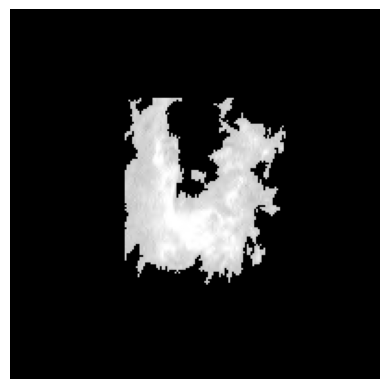

In [ ]:
# Display the image corresponding to index 0
plt.imshow(adjusted_images_AR_NSEP[0], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


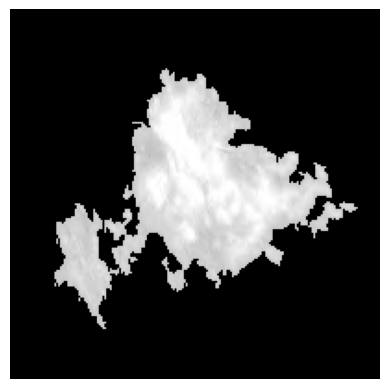

In [ ]:
# Display the image corresponding to index 0
plt.imshow(adjusted_images_AR_NSEP[1], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


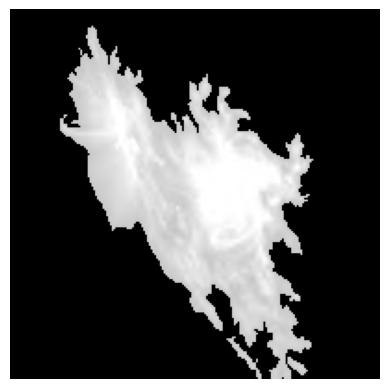

In [ ]:
# Display the image corresponding to index 0
plt.imshow(adjusted_images_AR_NSEP[2], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


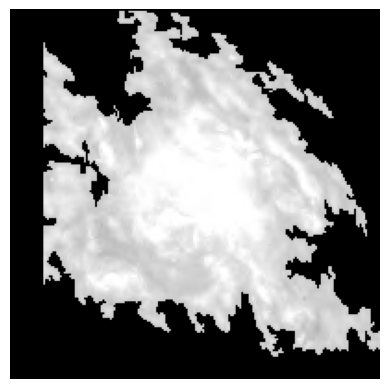

In [ ]:
# Display the image corresponding to index 0
plt.imshow(adjusted_images_AR_NSEP[3], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


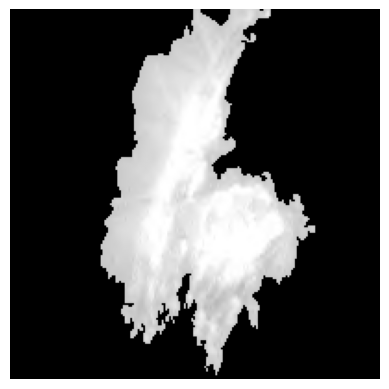

In [ ]:
# Display the image corresponding to index 0
plt.imshow(adjusted_images_AR_NSEP[4], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


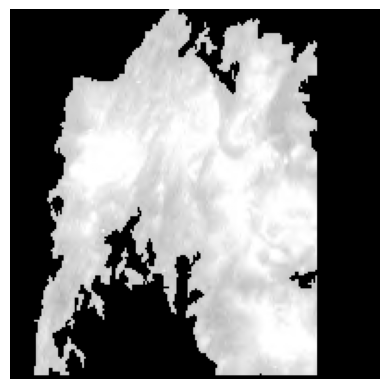

In [ ]:
# Display the image corresponding to index 0
plt.imshow(adjusted_images_AR_NSEP[5], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


# Models

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from skimage.feature import hog
from skimage.color import rgb2gray

# Define a function to extract HOG features from images
def extract_hog_features(image):
    # Convert image to grayscale if it's not already
    if len(image.shape) == 3:
        gray_image = rgb2gray(image)
    else:
        gray_image = image
    # Extract HOG features
    # hog_features = hog(gray_image, pixels_per_cell=(10, 10), cells_per_block=(4, 4), multichannel=False)
    hog_features = hog(gray_image, pixels_per_cell=(10, 10), cells_per_block=(4, 4))
    return hog_features

# Initialize empty lists for descriptors and labels
X = []
y = []

# Process images for NSEP
for cropped_image in adjusted_images_AR_NSEP.values():
    # Extract HOG features from each image
    hog_features = extract_hog_features(cropped_image)
    X.append(hog_features)
    y.append(0)  # NSEP label

# Process images for SEP
for cropped_image in adjusted_images_AR_SEP.values():
    # Extract HOG features from each image
    hog_features = extract_hog_features(cropped_image)
    X.append(hog_features)
    y.append(1)  # SEP label

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Initialize Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=80, random_state=42)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize empty list to store accuracy scores
accuracy_scores_RF_HOG = []

# Perform 5-fold stratified cross-validation
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the classifier to the training data
    random_forest.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = random_forest.predict(X_test)

    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_RF_HOG.append(accuracy)

# Calculate mean accuracy
mean_accuracy = np.mean(accuracy_scores_RF_HOG)
print(f"Mean accuracy of Random Forest classifier with HOG features using 5-fold stratified cross-validation: {mean_accuracy * 100:.2f}%")

# 58.89% for fixed threshold

Mean accuracy of Random Forest classifier with HOG features using 5-fold stratified cross-validation: 58.89%


In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from skimage.feature import hog
from skimage.color import rgb2gray

# Define a function to extract HOG features from images
def extract_hog_features(image):
    # Convert image to grayscale if it's not already
    if len(image.shape) == 3:
        gray_image = rgb2gray(image)
    else:
        gray_image = image
    # Extract HOG features
    hog_features = hog(gray_image, pixels_per_cell=(10, 10), cells_per_block=(4, 4))
    return hog_features

# Initialize empty lists for descriptors and labels
X = []
y = []

# Process images for NSEP
for cropped_image in adjusted_images_AR_NSEP.values():
    # Extract HOG features from each image
    hog_features = extract_hog_features(cropped_image)
    X.append(hog_features)
    y.append(0)  # NSEP label

# Process images for SEP
for cropped_image in adjusted_images_AR_SEP.values():
    # Extract HOG features from each image
    hog_features = extract_hog_features(cropped_image)
    X.append(hog_features)
    y.append(1)  # SEP label

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Initialize Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=80, random_state=42)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize empty lists to store metrics
accuracy_scores_RF_HOG = []
f1_scores_RF_HOG = []
precision_scores_RF_HOG = []
recall_scores_RF_HOG = []
tss_scores_RF_HOG = []
hss_scores_RF_HOG = []

# Perform 5-fold stratified cross-validation
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the classifier to the training data
    random_forest.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = random_forest.predict(X_test)

    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_RF_HOG.append(accuracy)

    # Calculate F1 score and append to the list
    f1 = f1_score(y_test, y_pred, average="weighted")
    f1_scores_RF_HOG.append(f1)

    # Calculate precision and recall and append to the lists
    precision = precision_score(y_test, y_pred, average='macro')
    precision_scores_RF_HOG.append(precision)
    recall = recall_score(y_test, y_pred, average='macro')
    recall_scores_RF_HOG.append(recall)

    # Confusion matrix for TSS and HSS
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # TSS calculation
    tss = (tp / (tp + fn)) - (fp / (fp + tn))
    tss_scores_RF_HOG.append(tss)

    # HSS calculation
    hss = (2 * ((tp * tn) - (fn * fp))) / (((tp + fn) * (fn + tn)) + ((fp + tn) * (tp + fp)))
    hss_scores_RF_HOG.append(hss)

# Calculate mean accuracy, F1 score, TSS, and HSS
mean_accuracy = np.mean(accuracy_scores_RF_HOG)
mean_f1 = np.mean(f1_scores_RF_HOG)
mean_tss = np.mean(tss_scores_RF_HOG)
mean_hss = np.mean(hss_scores_RF_HOG)

# Output the metrics
print(f"Mean accuracy: {mean_accuracy * 100:.2f}%")
print(f"Mean F1 score: {mean_f1:.2f}")
print(f"Mean TSS: {mean_tss:.2f}")
print(f"Mean HSS: {mean_hss:.2f}")
print(f"All Accuracy: {accuracy_scores_RF_HOG}")

# Fixed Threshold
# Mean accuracy: 58.89%
# Mean F1 score: 0.58
# Mean TSS: 0.13
# Mean HSS: 0.14

Mean accuracy: 58.89%
Mean F1 score: 0.58
Mean TSS: 0.13
Mean HSS: 0.14
All Accuracy: [0.7, 0.4, 0.8, 0.6, 0.4444444444444444]


In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.svm import SVC
from skimage.feature import hog
from skimage.color import rgb2gray

def extract_hog_features(image):
    if len(image.shape) == 3:  # Convert to grayscale
        gray_image = rgb2gray(image)
    else:
        gray_image = image
    return hog(gray_image, pixels_per_cell=(10, 10), cells_per_block=(4, 4))

X = []
y = []

for cropped_image in adjusted_images_AR_NSEP.values():
    X.append(extract_hog_features(cropped_image))
    y.append(0)

for cropped_image in adjusted_images_AR_SEP.values():
    X.append(extract_hog_features(cropped_image))
    y.append(1)

y = np.array(y)

try:
    X = np.vstack(X)
except ValueError:
    X = np.array([x.flatten() for x in X], dtype=object)

svm = SVC()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores_SVM_HOG = []
f1_scores_SVM_HOG = []
precision_scores_SVM_HOG = []
recall_scores_SVM_HOG = []
tss_scores_SVM_HOG = []
hss_scores_SVM_HOG = []

for train_index, test_index in skf.split(range(len(X)), y):
    X_train = [X[i] for i in train_index]
    X_test = [X[i] for i in test_index]
    y_train, y_test = y[train_index], y[test_index]

    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    prec = precision_score(y_test, y_pred, average="macro")
    rec = recall_score(y_test, y_pred, average="macro")

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tss = (tp / (tp + fn)) - (fp / (fp + tn))
    hss = (2 * ((tp * tn) - (fn * fp))) / (((tp + fn) * (fn + tn)) + ((fp + tn) * (tp + fp)))

    accuracy_scores_SVM_HOG.append(acc)
    f1_scores_SVM_HOG.append(f1)
    precision_scores_SVM_HOG.append(prec)
    recall_scores_SVM_HOG.append(rec)
    tss_scores_SVM_HOG.append(tss)
    hss_scores_SVM_HOG.append(hss)

mean_accuracy = np.mean(accuracy_scores_SVM_HOG)
mean_f1 = np.mean(f1_scores_SVM_HOG)
mean_tss = np.mean(tss_scores_SVM_HOG)
mean_hss = np.mean(hss_scores_SVM_HOG)

print("SVM + HOG Results")
print(f"Mean Accuracy: {mean_accuracy * 100:.2f}%")
print(f"Mean F1 Score: {mean_f1:.2f}")
print(f"Mean TSS: {mean_tss:.2f}")
print(f"Mean HSS: {mean_hss:.2f}")
print(f"All Accuracy: {accuracy_scores_SVM_HOG}")


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM + HOG Results
Mean Accuracy: 57.11%
Mean F1 Score: 0.42
Mean TSS: 0.00
Mean HSS: 0.00
All Accuracy: [0.5, 0.6, 0.6, 0.6, 0.5555555555555556]


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
!pip install catboost

   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   - -------------------------------------- 2.9/102.5 MB 15.2 MB/s eta 0:00:07
   --- ------------------------------------ 7.9/102.5 MB 20.3 MB/s eta 0:00:05
   ---- ----------------------------------- 11.8/102.5 MB 19.4 MB/s eta 0:00:05
   ------ --------------------------------- 16.8/102.5 MB 20.3 MB/s eta 0:00:05
   -------- ------------------------------- 21.8/102.5 MB 21.2 MB/s eta 0:00:04
   ---------- ----------------------------- 27.0/102.5 MB 21.9 MB/s eta 0:00:04
   ------------ --------------------------- 32.2/102.5 MB 22.3 MB/s eta 0:00:04
   -------------- ------------------------- 37.5/102.5 MB 22.7 MB/s eta 0:00:03
   ---------------- ----------------------- 41.7/102.5 MB 22.3 MB/s eta 0:00:03
   ----------------- ---------------------- 45.6/102.5 MB 22.0 MB/s eta 0:00:03
   ------------------- -------------------- 49.8/102.5 MB 21.7 MB/s eta 0:00:03
   --------------------- ------------------ 54.3/10

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from skimage.feature import hog
from skimage.color import rgb2gray
from xgboost import XGBClassifier

# === HOG Feature Extraction ===
def extract_hog_features(image):
    if len(image.shape) == 3:
        gray_image = rgb2gray(image)
    else:
        gray_image = image
    return hog(gray_image, pixels_per_cell=(10, 10), cells_per_block=(4, 4))

# Build X and y
X, y = [], []

for img in adjusted_images_AR_NSEP.values():
    X.append(extract_hog_features(img))
    y.append(0)
for img in adjusted_images_AR_SEP.values():
    X.append(extract_hog_features(img))
    y.append(1)

X, y = np.array(X), np.array(y)

# === Model ===
clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# === Cross-validation ===
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accs, f1s, tsss, hsss = [], [], [], []

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accs.append(accuracy_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred, average="weighted"))

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tss = (tp / (tp + fn)) - (fp / (fp + tn))
    hss = (2 * ((tp * tn) - (fn * fp))) / (((tp + fn)*(fn + tn)) + ((fp + tn)*(tp + fp)))
    tsss.append(tss)
    hsss.append(hss)

print("XGBoost + HOG Results")
print("Mean Accuracy:", (np.mean(accs) * 100))
print("Mean F1 Score:", np.mean(f1s))
print("Mean TSS:", np.mean(tsss))
print("Mean HSS:", np.mean(hsss))
print("All Accuracy:", (accs))

c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [11:59:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [11:59:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [11:59:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [11:59:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

XGBoost + HOG Results
Mean Accuracy: 47.333333333333336
Mean F1 Score: 0.47003663003663004
Mean TSS: -0.056666666666666685
Mean HSS: -0.04756015988253527
All Accuracy: [0.6, 0.4, 0.2, 0.5, 0.6666666666666666]


In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from skimage.feature import hog
from skimage.color import rgb2gray
from sklearn.neural_network import MLPClassifier

def extract_hog_features(image):
    if len(image.shape) == 3:
        gray_image = rgb2gray(image)
    else:
        gray_image = image
    return hog(gray_image, pixels_per_cell=(10, 10), cells_per_block=(4, 4))

X, y = [], []
for img in adjusted_images_AR_NSEP.values():
    X.append(extract_hog_features(img))
    y.append(0)
for img in adjusted_images_AR_SEP.values():
    X.append(extract_hog_features(img))
    y.append(1)

X, y = np.array(X), np.array(y)

clf = MLPClassifier(random_state=42, max_iter=500)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accs, f1s, tsss, hsss = [], [], [], []

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accs.append(accuracy_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred, average="weighted"))

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tss = (tp / (tp + fn)) - (fp / (fp + tn))
    hss = (2 * ((tp * tn) - (fn * fp))) / (((tp + fn)*(fn + tn)) + ((fp + tn)*(tp + fp)))
    tsss.append(tss)
    hsss.append(hss)

print("MLP + HOG Results")
print("Mean Accuracy:", np.mean(accs))
print("Mean F1 Score:", np.mean(f1s))
print("Mean TSS:", np.mean(tsss))
print("Mean HSS:", np.mean(hsss))
print("All Accuracy:", (accs))

MLP + HOG Results
Mean Accuracy: 0.5511111111111111
Mean F1 Score: 0.5083923483923484
Mean TSS: 0.09333333333333335
Mean HSS: 0.09547614856539341
All Accuracy: [0.5, 0.4, 0.7, 0.6, 0.5555555555555556]


In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from skimage.feature import hog
from skimage.color import rgb2gray
from catboost import CatBoostClassifier

def extract_hog_features(image):
    if len(image.shape) == 3:
        gray_image = rgb2gray(image)
    else:
        gray_image = image
    return hog(gray_image, pixels_per_cell=(10, 10), cells_per_block=(4, 4))

X, y = [], []
for img in adjusted_images_AR_NSEP.values():
    X.append(extract_hog_features(img))
    y.append(0)
for img in adjusted_images_AR_SEP.values():
    X.append(extract_hog_features(img))
    y.append(1)

X, y = np.array(X), np.array(y)

clf = CatBoostClassifier(verbose=0, random_seed=42)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accs, f1s, tsss, hsss = [], [], [], []

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accs.append(accuracy_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred, average="weighted"))

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tss = (tp / (tp + fn)) - (fp / (fp + tn))
    hss = (2 * ((tp * tn) - (fn * fp))) / (((tp + fn)*(fn + tn)) + ((fp + tn)*(tp + fp)))
    tsss.append(tss)
    hsss.append(hss)

print("CatBoost + HOG Results")
print("Mean Accuracy:", np.mean(accs))
print("Mean F1 Score:", np.mean(f1s))
print("Mean TSS:", np.mean(tsss))
print("Mean HSS:", np.mean(hsss))


=== CatBoost + HOG Results ===
Mean Accuracy: 0.531111111111111
Mean F1 Score: 0.47639234839234845
Mean TSS: -0.006666666666666665
Mean HSS: 0.003901056990301843


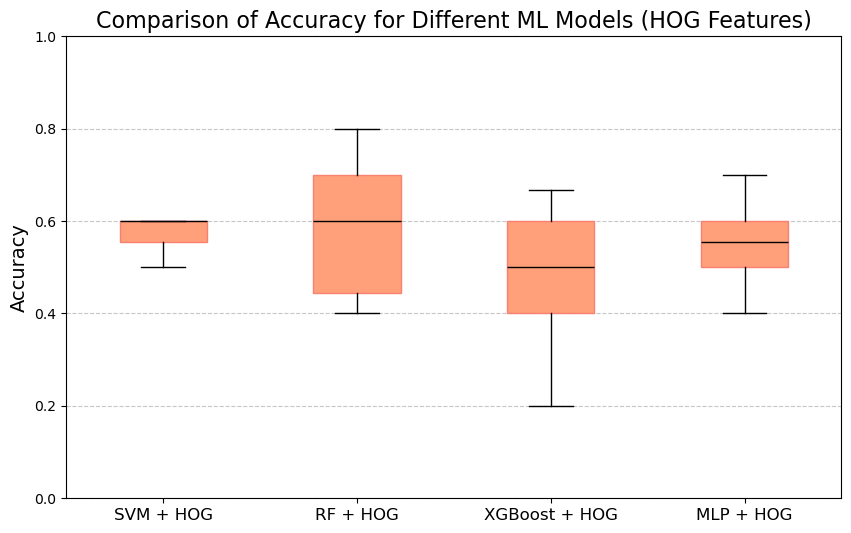

In [ ]:
import matplotlib.pyplot as plt

accuracy_data = {
    "SVM + HOG": [0.5, 0.6, 0.6, 0.6, 0.5555555555555556],
    "RF + HOG": [0.7, 0.4, 0.8, 0.6, 0.4444444444444444],
    "XGBoost + HOG": [0.6, 0.4, 0.2, 0.5, 0.6666666666666666],
    "MLP + HOG": [0.5, 0.4, 0.7, 0.6, 0.5555555555555556]
}

plt.figure(figsize=(10, 6))
plt.boxplot(accuracy_data.values(), patch_artist=True, 
            boxprops=dict(facecolor='lightsalmon', color='salmon'),
            medianprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'))

plt.xticks(range(1, len(accuracy_data) + 1), accuracy_data.keys(), fontsize=12)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Comparison of Accuracy for Different ML Models (HOG Features)", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 1)

plt.show()

#463

# Optimized Models

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from skimage.feature import hog
from skimage.color import rgb2gray

def extract_hog_features(image):
    if len(image.shape) == 3:
        gray_image = rgb2gray(image)
    else:
        gray_image = image
    hog_features = hog(gray_image, pixels_per_cell=(10, 10), cells_per_block=(4, 4))
    return hog_features

X = []
y = []

for img in adjusted_images_AR_NSEP.values():
    X.append(extract_hog_features(img))
    y.append(0)

for img in adjusted_images_AR_SEP.values():
    X.append(extract_hog_features(img))
    y.append(1)

X = np.array(X)
y = np.array(y)

param_grid = {
    'C': [0.1, 1, 10, 100],              # Regularization strength
    'kernel': ['linear', 'rbf', 'poly'], # Kernel type
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Kernel coefficient
    'degree': [2, 3, 4],                 # Only relevant for 'poly' kernel
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    scoring='accuracy',
    cv=skf,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X, y)

print("\nBest Parameters for SVM + HOG:")
print(grid_search.best_params_)
print(f"Best Cross-Validated Accuracy: {grid_search.best_score_ * 100:.2f}%")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Best Parameters for SVM + HOG:
{'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validated Accuracy: 61.11%


In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.svm import SVC
from skimage.feature import hog
from skimage.color import rgb2gray

def extract_hog_features(image):
    if len(image.shape) == 3:  # Convert to grayscale
        gray_image = rgb2gray(image)
    else:
        gray_image = image
    return hog(gray_image, pixels_per_cell=(10, 10), cells_per_block=(4, 4))

X = []
y = []

for cropped_image in adjusted_images_AR_NSEP.values():
    X.append(extract_hog_features(cropped_image))
    y.append(0)

for cropped_image in adjusted_images_AR_SEP.values():
    X.append(extract_hog_features(cropped_image))
    y.append(1)

y = np.array(y)

try:
    X = np.vstack(X)
except ValueError:
    X = np.array([x.flatten() for x in X], dtype=object)

svm = SVC(C=10, degree=2, gamma='scale', kernel='rbf', random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores_SVM_HOG = []
f1_scores_SVM_HOG = []
precision_scores_SVM_HOG = []
recall_scores_SVM_HOG = []
tss_scores_SVM_HOG = []
hss_scores_SVM_HOG = []

for train_index, test_index in skf.split(range(len(X)), y):
    X_train = [X[i] for i in train_index]
    X_test = [X[i] for i in test_index]
    y_train, y_test = y[train_index], y[test_index]

    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    prec = precision_score(y_test, y_pred, average="macro")
    rec = recall_score(y_test, y_pred, average="macro")

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tss = (tp / (tp + fn)) - (fp / (fp + tn))
    hss = (2 * ((tp * tn) - (fn * fp))) / (((tp + fn) * (fn + tn)) + ((fp + tn) * (tp + fp)))

    accuracy_scores_SVM_HOG.append(acc)
    f1_scores_SVM_HOG.append(f1)
    precision_scores_SVM_HOG.append(prec)
    recall_scores_SVM_HOG.append(rec)
    tss_scores_SVM_HOG.append(tss)
    hss_scores_SVM_HOG.append(hss)

mean_accuracy = np.mean(accuracy_scores_SVM_HOG)
mean_f1 = np.mean(f1_scores_SVM_HOG)
mean_tss = np.mean(tss_scores_SVM_HOG)
mean_hss = np.mean(hss_scores_SVM_HOG)

print("SVM + HOG Results")
print(f"Mean Accuracy: {mean_accuracy * 100:.2f}%")
print(f"Mean F1 Score: {mean_f1:.2f}")
print(f"Mean TSS: {mean_tss:.2f}")
print(f"Mean HSS: {mean_hss:.2f}")
print(f"All Accuracy: {accuracy_scores_SVM_HOG}")


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM + HOG Results
Mean Accuracy: 61.11%
Mean F1 Score: 0.55
Mean TSS: 0.14
Mean HSS: 0.16
All Accuracy: [0.5, 0.6, 0.8, 0.6, 0.5555555555555556]


In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from skimage.feature import hog
from skimage.color import rgb2gray

def extract_hog_features(image):
    if len(image.shape) == 3: 
        gray_image = rgb2gray(image)
    else:
        gray_image = image
    return hog(gray_image, pixels_per_cell=(10, 10), cells_per_block=(4, 4))

X = []
y = []

for cropped_image in adjusted_images_AR_NSEP.values():
    X.append(extract_hog_features(cropped_image))
    y.append(0)

for cropped_image in adjusted_images_AR_SEP.values():
    X.append(extract_hog_features(cropped_image))
    y.append(1)

X = np.array(X)
y = np.array(y)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring=make_scorer(accuracy_score),
    cv=skf,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X, y)

print("Best Parameters for RF + HOG:", grid_search.best_params_)
print(f"Best Accuracy: {grid_search.best_score_ * 100:.2f}%")


Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Best Parameters for RF + HOG: {'bootstrap': True, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 63.33%


In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from skimage.feature import hog
from skimage.color import rgb2gray

# Define a function to extract HOG features from images
def extract_hog_features(image):
    # Convert image to grayscale if it's not already
    if len(image.shape) == 3:
        gray_image = rgb2gray(image)
    else:
        gray_image = image
    # Extract HOG features
    hog_features = hog(gray_image, pixels_per_cell=(10, 10), cells_per_block=(4, 4))
    return hog_features

# Initialize empty lists for descriptors and labels
X = []
y = []

# Process images for NSEP
for cropped_image in adjusted_images_AR_NSEP.values():
    hog_features = extract_hog_features(cropped_image)
    X.append(hog_features)
    y.append(0)  # NSEP label

# Process images for SEP
for cropped_image in adjusted_images_AR_SEP.values():
    hog_features = extract_hog_features(cropped_image)
    X.append(hog_features)
    y.append(1)  # SEP label

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

random_forest = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    max_features='log2',
    min_samples_leaf=1,
    min_samples_split=2,
    bootstrap=True,
    random_state=42
)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize empty lists to store metrics
accuracy_scores_RF_HOG = []
f1_scores_RF_HOG = []
precision_scores_RF_HOG = []
recall_scores_RF_HOG = []
tss_scores_RF_HOG = []
hss_scores_RF_HOG = []

# Perform 5-fold stratified cross-validation
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the classifier to the training data
    random_forest.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = random_forest.predict(X_test)

    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_RF_HOG.append(accuracy)

    # Calculate F1 score and append to the list
    f1 = f1_score(y_test, y_pred, average="weighted")
    f1_scores_RF_HOG.append(f1)

    # Calculate precision and recall and append to the lists
    precision = precision_score(y_test, y_pred, average='macro')
    precision_scores_RF_HOG.append(precision)
    recall = recall_score(y_test, y_pred, average='macro')
    recall_scores_RF_HOG.append(recall)

    # Confusion matrix for TSS and HSS
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # TSS calculation
    tss = (tp / (tp + fn)) - (fp / (fp + tn))
    tss_scores_RF_HOG.append(tss)

    # HSS calculation
    hss = (2 * ((tp * tn) - (fn * fp))) / (
        ((tp + fn) * (fn + tn)) + ((fp + tn) * (tp + fp))
    )
    hss_scores_RF_HOG.append(hss)

# Calculate mean accuracy, F1 score, TSS, and HSS
mean_accuracy = np.mean(accuracy_scores_RF_HOG)
mean_f1 = np.mean(f1_scores_RF_HOG)
mean_tss = np.mean(tss_scores_RF_HOG)
mean_hss = np.mean(hss_scores_RF_HOG)

# Output the metrics
print("Optimized RF + HOG Results")
print(f"Mean accuracy: {mean_accuracy * 100:.2f}%")
print(f"Mean F1 score: {mean_f1:.2f}")
print(f"Mean TSS: {mean_tss:.2f}")
print(f"Mean HSS: {mean_hss:.2f}")
print(f"All Accuracy: {accuracy_scores_RF_HOG}")


=== Optimized RF + HOG Results ===
Mean accuracy: 63.33%
Mean F1 score: 0.58
Mean TSS: 0.18
Mean HSS: 0.19
All Accuracy: [0.6, 0.5, 0.8, 0.6, 0.6666666666666666]


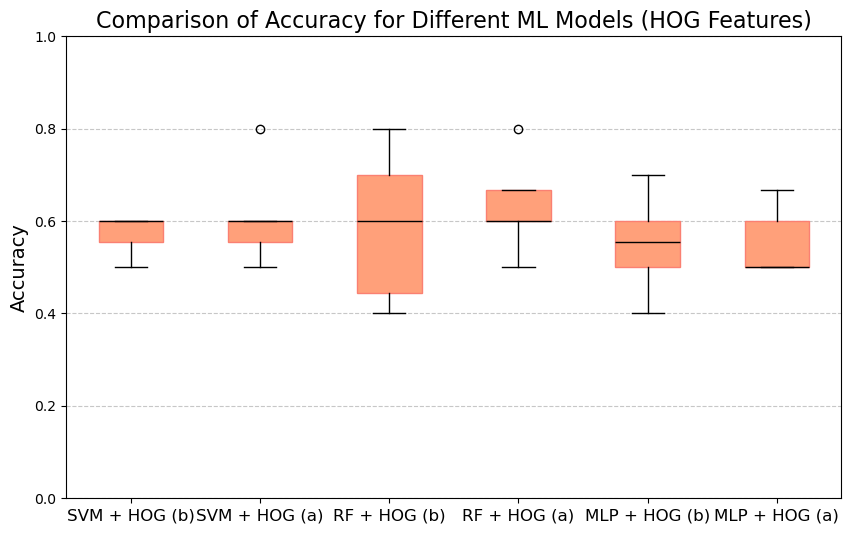

In [ ]:
import matplotlib.pyplot as plt

accuracy_data = {
    "SVM + HOG (b)": [0.5, 0.6, 0.6, 0.6, 0.5555555555555556],
    "SVM + HOG (a)": [0.5, 0.6, 0.8, 0.6, 0.5555555555555556],
    "RF + HOG (b)": [0.7, 0.4, 0.8, 0.6, 0.4444444444444444],
    "RF + HOG (a)": [0.6, 0.5, 0.8, 0.6, 0.6666666666666666],
    "MLP + HOG (b)": [0.5, 0.4, 0.7, 0.6, 0.5555555555555556],
    "MLP + HOG (a)": [0.5, 0.5, 0.5, 0.6, 0.6666666666666666]
}

plt.figure(figsize=(10, 6))
plt.boxplot(accuracy_data.values(), patch_artist=True, 
            boxprops=dict(facecolor='lightsalmon', color='salmon'),
            medianprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'))

plt.xticks(range(1, len(accuracy_data) + 1), accuracy_data.keys(), fontsize=12)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Comparison of Accuracy for Different ML Models (HOG Features)", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 1)

plt.show()

#463

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, f1_score
from skimage.feature import hog
from skimage.color import rgb2gray

def extract_hog_features(image):
    if len(image.shape) == 3:
        gray_image = rgb2gray(image)
    else:
        gray_image = image
    hog_features = hog(gray_image, pixels_per_cell=(10, 10), cells_per_block=(4, 4))
    return hog_features

X = []
y = []

for img in adjusted_images_AR_NSEP.values():
    X.append(extract_hog_features(img))
    y.append(0)

for img in adjusted_images_AR_SEP.values():
    X.append(extract_hog_features(img))
    y.append(1)

X = np.array(X)
y = np.array(y)

mlp = MLPClassifier(max_iter=2000, random_state=42)

param_grid = {
    'hidden_layer_sizes': [(50,), (100,)], #, (100, 50), (150, 75)
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

scorer = make_scorer(f1_score, average='weighted')

grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X, y)

print("Best Parameters for MLP + HOG:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, f1_score
from skimage.feature import hog
from skimage.color import rgb2gray

def extract_hog_features(image):
    if len(image.shape) == 3:
        gray_image = rgb2gray(image)
    else:
        gray_image = image
    hog_features = hog(gray_image, pixels_per_cell=(10, 10), cells_per_block=(4, 4))
    return hog_features

X = []
y = []

for img in adjusted_images_AR_NSEP.values():
    X.append(extract_hog_features(img))
    y.append(0)

for img in adjusted_images_AR_SEP.values():
    X.append(extract_hog_features(img))
    y.append(1)

X = np.array(X)
y = np.array(y)

mlp = MLPClassifier(max_iter=2000, random_state=42)

param_grid = {
    'hidden_layer_sizes': [(100, 50), (150, 75)], #, (50,), (100,)
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

scorer = make_scorer(f1_score, average='weighted')

grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X, y)

print("Best Parameters for MLP + HOG:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

# Fitting 5 folds for each of 48 candidates, totalling 240 fits
# Best Parameters for MLP + HOG: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'lbfgs'}
# Best F1 Score: 0.579100899100899

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters for MLP + HOG: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'lbfgs'}
Best F1 Score: 0.579100899100899
Fitting 5 folds for each of 48 candidates, totalling 240 fits


KeyboardInterrupt: 

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from skimage.feature import hog
from skimage.color import rgb2gray

def extract_hog_features(image):
    if len(image.shape) == 3:
        gray_image = rgb2gray(image)
    else:
        gray_image = image
    return hog(gray_image, pixels_per_cell=(10, 10), cells_per_block=(4, 4))

X, y = [], []
for cropped_image in adjusted_images_AR_NSEP.values():
    X.append(extract_hog_features(cropped_image))
    y.append(0)
for cropped_image in adjusted_images_AR_SEP.values():
    X.append(extract_hog_features(cropped_image))
    y.append(1)

X = np.array(X)
y = np.array(y)

mlp = MLPClassifier(
    max_iter=1000,
    early_stopping=True,
    n_iter_no_change=20,
    validation_fraction=0.1,
    random_state=42
)

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01],
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,   # Use all cores for speed
    verbose=2
)

grid_search.fit(X, y)

print("\nBest Parameters for MLP + HOG:")
print(grid_search.best_params_)
print(f"Best Accuracy: {grid_search.best_score_ * 100:.2f}%")


Fitting 5 folds for each of 36 candidates, totalling 180 fits

Best Parameters for MLP + HOG:
{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.01, 'solver': 'adam'}
Best Accuracy: 65.11%


In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from skimage.feature import hog
from skimage.color import rgb2gray
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

def extract_hog_features(image):
    if len(image.shape) == 3:
        gray_image = rgb2gray(image)
    else:
        gray_image = image
    return hog(gray_image, pixels_per_cell=(10, 10), cells_per_block=(4, 4))

X, y = [], []
for img in adjusted_images_AR_NSEP.values():
    X.append(extract_hog_features(img))
    y.append(0)
for img in adjusted_images_AR_SEP.values():
    X.append(extract_hog_features(img))
    y.append(1)

X, y = np.array(X), np.array(y)


clf = make_pipeline(
    StandardScaler(),
    MLPClassifier(
        activation='tanh',
        alpha=0.0001,
        hidden_layer_sizes=(50,),
        learning_rate_init=0.01,
        solver='adam',
        max_iter=1000,
        random_state=42
    )
)

# clf = MLPClassifier(
#     activation='tanh',
#     alpha=0.0001,
#     hidden_layer_sizes=(50,),
#     learning_rate_init=0.01,
#     solver='adam',
#     random_state=42,
#     max_iter=500
# )

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accs, f1s, tsss, hsss = [], [], [], []

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Metrics
    accs.append(accuracy_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred, average="weighted"))

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tss = (tp / (tp + fn)) - (fp / (fp + tn))
    hss = (2 * ((tp * tn) - (fn * fp))) / (((tp + fn)*(fn + tn)) + ((fp + tn)*(tp + fp)))
    tsss.append(tss)
    hsss.append(hss)

print("Optimized MLP + HOG Results")
print(f"Mean Accuracy: {np.mean(accs) * 100:.2f}%")
print(f"Mean F1 Score: {np.mean(f1s):.2f}")
print(f"Mean TSS: {np.mean(tsss):.2f}")
print(f"Mean HSS: {np.mean(hsss):.2f}")
print(f"All Accuracy: {accs}")


Optimized MLP + HOG Results
Mean Accuracy: 55.33%
Mean F1 Score: 0.53
Mean TSS: 0.10
Mean HSS: 0.09
All Accuracy: [0.5, 0.5, 0.5, 0.6, 0.6666666666666666]


In [ ]:
pip install optuna

^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import optuna
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from skimage.feature import hog
from skimage.color import rgb2gray
from xgboost import XGBClassifier

def extract_hog_features(image):
    if len(image.shape) == 3:
        gray_image = rgb2gray(image)
    else:
        gray_image = image
    return hog(gray_image, pixels_per_cell=(10, 10), cells_per_block=(4, 4))

X, y = [], []
for img in adjusted_images_AR_NSEP.values():
    X.append(extract_hog_features(img))
    y.append(0)
for img in adjusted_images_AR_SEP.values():
    X.append(extract_hog_features(img))
    y.append(1)

X, y = np.array(X), np.array(y)

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 350),
        "max_depth": trial.suggest_int("max_depth", 2, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0.0, 5.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "use_label_encoder": False,
        "eval_metric": "logloss"
    }

    clf = XGBClassifier(**params)

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accs = []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accs.append(accuracy_score(y_test, y_pred))

    return np.mean(accs)

# the Optuna Study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=60, show_progress_bar=True)  # can increase n_trials later

print("\nBest Trial Accuracy:", study.best_value)
print("Best Parameters:\n", study.best_params)

# Save study for later use
study.trials_dataframe().to_csv("xgboost_optuna_results.csv", index=False)


[I 2025-11-18 10:25:19,613] A new study created in memory with name: no-name-1016640b-a9b9-4d35-ab82-16a31a41f2ad
  0%|          | 0/60 [00:00<?, ?it/s]c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:25:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:25:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:25:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-pac

[I 2025-11-18 10:25:30,206] Trial 0 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 152, 'max_depth': 5, 'learning_rate': 0.07559710325579355, 'subsample': 0.6979258098407706, 'colsample_bytree': 0.5284461148513774, 'gamma': 2.0449270691427595, 'min_child_weight': 9}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:25:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:25:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:25:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:25:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:25:46,648] Trial 1 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 242, 'max_depth': 5, 'learning_rate': 0.0020911183005844864, 'subsample': 0.8098485918970719, 'colsample_bytree': 0.6601024841636223, 'gamma': 1.0924002481784627, 'min_child_weight': 7}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:25:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:25:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:25:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:25:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:25:55,551] Trial 2 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 85, 'max_depth': 5, 'learning_rate': 0.027222945251427717, 'subsample': 0.7652774667571938, 'colsample_bytree': 0.5893011722708217, 'gamma': 0.04621789354408934, 'min_child_weight': 10}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:25:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:25:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:25:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:26:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:26:02,841] Trial 3 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 73, 'max_depth': 8, 'learning_rate': 0.02017125738249446, 'subsample': 0.98947599746562, 'colsample_bytree': 0.9581692406386194, 'gamma': 3.682080138708266, 'min_child_weight': 6}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:26:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:26:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:26:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:26:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:26:13,328] Trial 4 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 128, 'max_depth': 5, 'learning_rate': 0.0665640607630736, 'subsample': 0.7001273754430397, 'colsample_bytree': 0.9048763115228149, 'gamma': 2.7745897858092228, 'min_child_weight': 5}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:26:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:26:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:26:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:26:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:26:32,549] Trial 5 finished with value: 0.4688888888888888 and parameters: {'n_estimators': 171, 'max_depth': 4, 'learning_rate': 0.012866924905320924, 'subsample': 0.6928135321224813, 'colsample_bytree': 0.6529535192627087, 'gamma': 2.860467693933849, 'min_child_weight': 3}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:26:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:26:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:26:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:26:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:26:44,546] Trial 6 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 160, 'max_depth': 7, 'learning_rate': 0.013711050502229375, 'subsample': 0.5047397831474043, 'colsample_bytree': 0.7941187333623214, 'gamma': 1.1244422448201101, 'min_child_weight': 3}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:26:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:26:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:26:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:26:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:27:03,028] Trial 7 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 257, 'max_depth': 6, 'learning_rate': 0.07763803561844902, 'subsample': 0.7824920887713454, 'colsample_bytree': 0.9066759120642363, 'gamma': 4.358929956991806, 'min_child_weight': 9}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:27:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:27:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:27:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:27:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:27:22,280] Trial 8 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 270, 'max_depth': 10, 'learning_rate': 0.016816249132492713, 'subsample': 0.815642528791328, 'colsample_bytree': 0.8373623667958858, 'gamma': 4.475000709121798, 'min_child_weight': 5}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:27:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:27:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:27:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:27:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:27:36,184] Trial 9 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 196, 'max_depth': 6, 'learning_rate': 0.004263104576533863, 'subsample': 0.864195650385147, 'colsample_bytree': 0.9035164037395634, 'gamma': 3.3576417116934816, 'min_child_weight': 5}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:27:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:27:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:27:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:27:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:27:56,187] Trial 10 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 327, 'max_depth': 2, 'learning_rate': 0.2652739029847067, 'subsample': 0.5712871911858083, 'colsample_bytree': 0.5000785422428399, 'gamma': 1.7142661980436529, 'min_child_weight': 8}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:27:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:27:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:28:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:28:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:28:12,686] Trial 11 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 245, 'max_depth': 3, 'learning_rate': 0.001099866757254221, 'subsample': 0.9146637477515898, 'colsample_bytree': 0.6715147057324775, 'gamma': 1.432582304339657, 'min_child_weight': 7}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:28:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:28:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:28:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:28:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:28:27,209] Trial 12 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 229, 'max_depth': 4, 'learning_rate': 0.0012324244790749735, 'subsample': 0.6453859927997547, 'colsample_bytree': 0.5239376227242132, 'gamma': 0.28772618993047105, 'min_child_weight': 10}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:28:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:28:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:28:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:28:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:28:47,987] Trial 13 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 308, 'max_depth': 8, 'learning_rate': 0.003651240608660328, 'subsample': 0.6180587778380844, 'colsample_bytree': 0.7054237801018055, 'gamma': 2.110022503062098, 'min_child_weight': 8}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:28:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:28:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:28:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:28:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:29:04,357] Trial 14 finished with value: 0.49111111111111116 and parameters: {'n_estimators': 130, 'max_depth': 4, 'learning_rate': 0.28458626710539864, 'subsample': 0.8631741820604013, 'colsample_bytree': 0.5863241364399512, 'gamma': 0.9915554657465627, 'min_child_weight': 1}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:29:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:29:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:32:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:32:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:33:00,666] Trial 15 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 205, 'max_depth': 2, 'learning_rate': 0.08908874987127183, 'subsample': 0.7113298154909933, 'colsample_bytree': 0.5927631159738889, 'gamma': 0.7259535522374212, 'min_child_weight': 7}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:33:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:33:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:33:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:33:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:33:20,412] Trial 16 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 285, 'max_depth': 7, 'learning_rate': 0.005526562685180731, 'subsample': 0.8233231562363651, 'colsample_bytree': 0.7452264739192864, 'gamma': 2.073387114056817, 'min_child_weight': 9}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:33:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:33:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:33:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:33:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:33:29,090] Trial 17 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 125, 'max_depth': 5, 'learning_rate': 0.040572465737288704, 'subsample': 0.9317329657808544, 'colsample_bytree': 0.5553823539641144, 'gamma': 2.1499983124601343, 'min_child_weight': 7}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:33:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:33:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:33:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:33:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:33:43,834] Trial 18 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 215, 'max_depth': 3, 'learning_rate': 0.0023253938294958624, 'subsample': 0.7355920300736266, 'colsample_bytree': 0.6433989371574397, 'gamma': 1.5685820213847412, 'min_child_weight': 9}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:33:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:33:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:33:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:33:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:33:56,425] Trial 19 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 174, 'max_depth': 10, 'learning_rate': 0.13829876237812405, 'subsample': 0.6500172553806337, 'colsample_bytree': 0.7200260132363486, 'gamma': 0.762014086703551, 'min_child_weight': 6}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:33:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:34:19,440] Trial 20 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 347, 'max_depth': 7, 'learning_rate': 0.007543157234731415, 'subsample': 0.5538332269551349, 'colsample_bytree': 0.6254427034418951, 'gamma': 3.461101465153758, 'min_child_weight': 8}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:34:23,816] Trial 21 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 53, 'max_depth': 5, 'learning_rate': 0.02953228452602896, 'subsample': 0.7770052021672325, 'colsample_bytree': 0.5647390225144461, 'gamma': 0.047453714493847166, 'min_child_weight': 10}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:34:31,252] Trial 22 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 96, 'max_depth': 5, 'learning_rate': 0.037076285619551265, 'subsample': 0.7821465630584851, 'colsample_bytree': 0.6136572687132172, 'gamma': 0.004606333591380185, 'min_child_weight': 10}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:34:37,823] Trial 23 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 87, 'max_depth': 6, 'learning_rate': 0.00892588264893004, 'subsample': 0.750608735608641, 'colsample_bytree': 0.532839683709952, 'gamma': 0.4887012657094063, 'min_child_weight': 10}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:34:48,409] Trial 24 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 146, 'max_depth': 3, 'learning_rate': 0.16893327301115482, 'subsample': 0.846050319966896, 'colsample_bytree': 0.6723775587244795, 'gamma': 1.2081328384757508, 'min_child_weight': 9}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:34:55,182] Trial 25 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 105, 'max_depth': 4, 'learning_rate': 0.02590234794272076, 'subsample': 0.666143229105406, 'colsample_bytree': 0.5722819311073305, 'gamma': 0.48648192356865594, 'min_child_weight': 8}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:35:07,408] Trial 26 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 185, 'max_depth': 6, 'learning_rate': 0.051031849455081275, 'subsample': 0.9047577541372395, 'colsample_bytree': 0.7746522817676886, 'gamma': 2.311209341906319, 'min_child_weight': 9}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:35:12,162] Trial 27 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 64, 'max_depth': 5, 'learning_rate': 0.12767471546117065, 'subsample': 0.7425908545227262, 'colsample_bytree': 0.5026113144159131, 'gamma': 1.6527725836881024, 'min_child_weight': 7}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:35:32,360] Trial 28 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 231, 'max_depth': 8, 'learning_rate': 0.0020666424865118708, 'subsample': 0.8114019374898827, 'colsample_bytree': 0.7030087728924794, 'gamma': 2.706638992023493, 'min_child_weight': 4}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:35:38,016] Trial 29 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 75, 'max_depth': 9, 'learning_rate': 0.02097069346806028, 'subsample': 0.9937370901169398, 'colsample_bytree': 0.6084411705914388, 'gamma': 0.7481716614338882, 'min_child_weight': 6}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:35:46,041] Trial 30 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 111, 'max_depth': 7, 'learning_rate': 0.04944116541702811, 'subsample': 0.6052656315082268, 'colsample_bytree': 0.5489749989736337, 'gamma': 4.884417668037601, 'min_child_weight': 8}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:35:52,999] Trial 31 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 80, 'max_depth': 8, 'learning_rate': 0.00957541485138656, 'subsample': 0.9841981038181616, 'colsample_bytree': 0.9416852688221474, 'gamma': 3.3544847612649353, 'min_child_weight': 6}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:35:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:36:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:36:05,457] Trial 32 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 153, 'max_depth': 5, 'learning_rate': 0.025048815428673887, 'subsample': 0.7043416568792118, 'colsample_bytree': 0.9710496885208967, 'gamma': 2.9403903706868335, 'min_child_weight': 4}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:36:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:36:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:36:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:36:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:36:15,646] Trial 33 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 127, 'max_depth': 5, 'learning_rate': 0.01277584596317064, 'subsample': 0.6869641699718796, 'colsample_bytree': 0.8490409157162672, 'gamma': 3.8082336052327683, 'min_child_weight': 4}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:36:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:36:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:36:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:36:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:36:20,181] Trial 34 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 55, 'max_depth': 4, 'learning_rate': 0.06366826284706265, 'subsample': 0.9693131379058604, 'colsample_bytree': 0.6485309794317371, 'gamma': 1.8944396970741213, 'min_child_weight': 6}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:36:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:36:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:36:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:36:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:36:44,502] Trial 35 finished with value: 0.49111111111111116 and parameters: {'n_estimators': 107, 'max_depth': 9, 'learning_rate': 0.01666159118067264, 'subsample': 0.9507923688134733, 'colsample_bytree': 0.9942679361486344, 'gamma': 3.897457786727681, 'min_child_weight': 1}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:36:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:36:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:36:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:36:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:37:04,564] Trial 36 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 279, 'max_depth': 6, 'learning_rate': 0.10315146413725032, 'subsample': 0.8900517598623078, 'colsample_bytree': 0.8585879808848992, 'gamma': 2.712201545301222, 'min_child_weight': 9}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:37:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:37:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:37:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:37:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:37:17,189] Trial 37 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 165, 'max_depth': 6, 'learning_rate': 0.012020174192634965, 'subsample': 0.7646506525633454, 'colsample_bytree': 0.8827951203303455, 'gamma': 1.2158939215679054, 'min_child_weight': 5}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:37:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:37:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:37:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:37:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:37:27,534] Trial 38 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 141, 'max_depth': 9, 'learning_rate': 0.06355743998554872, 'subsample': 0.7223736443747591, 'colsample_bytree': 0.805862276655411, 'gamma': 2.509337354604223, 'min_child_weight': 7}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:37:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:37:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:37:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:37:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:37:38,007] Trial 39 finished with value: 0.45111111111111113 and parameters: {'n_estimators': 67, 'max_depth': 7, 'learning_rate': 0.01872822397104664, 'subsample': 0.8027975090367987, 'colsample_bytree': 0.5367657094558528, 'gamma': 3.1782223771597033, 'min_child_weight': 2}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:37:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:37:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:37:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:37:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:37:54,986] Trial 40 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 247, 'max_depth': 4, 'learning_rate': 0.034666724075533804, 'subsample': 0.679314713979943, 'colsample_bytree': 0.6789614191248994, 'gamma': 4.221970774584787, 'min_child_weight': 10}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:37:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:37:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:37:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:38:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:38:02,884] Trial 41 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 88, 'max_depth': 5, 'learning_rate': 0.21290191888146046, 'subsample': 0.628944707742326, 'colsample_bytree': 0.9325650177833155, 'gamma': 3.740652396571914, 'min_child_weight': 5}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:38:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:38:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:38:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:38:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:38:13,352] Trial 42 finished with value: 0.4533333333333333 and parameters: {'n_estimators': 119, 'max_depth': 4, 'learning_rate': 0.06944246012045732, 'subsample': 0.5203460104398808, 'colsample_bytree': 0.9114765618986097, 'gamma': 3.0662261956356773, 'min_child_weight': 3}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:38:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:38:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:38:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:38:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:38:27,671] Trial 43 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 183, 'max_depth': 6, 'learning_rate': 0.09986945672535366, 'subsample': 0.5939572246126497, 'colsample_bytree': 0.9611180986606547, 'gamma': 1.3532381235060322, 'min_child_weight': 5}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:38:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:38:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:38:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:38:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:38:37,574] Trial 44 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 139, 'max_depth': 3, 'learning_rate': 0.04712330929652251, 'subsample': 0.8393317018044892, 'colsample_bytree': 0.5974303566300835, 'gamma': 1.7800076289817075, 'min_child_weight': 6}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:38:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:38:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:38:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:38:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:38:57,451] Trial 45 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 258, 'max_depth': 5, 'learning_rate': 0.004267373239862271, 'subsample': 0.7188025970875455, 'colsample_bytree': 0.996534735533473, 'gamma': 2.4481397803364873, 'min_child_weight': 7}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:38:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:38:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:39:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:39:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:39:04,926] Trial 46 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 97, 'max_depth': 6, 'learning_rate': 0.002207210369044444, 'subsample': 0.8712047436415248, 'colsample_bytree': 0.8239342044446671, 'gamma': 0.992283122907115, 'min_child_weight': 8}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:39:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:39:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:39:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:39:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:39:19,920] Trial 47 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 209, 'max_depth': 5, 'learning_rate': 0.0013961805358655552, 'subsample': 0.6648864004419007, 'colsample_bytree': 0.7463492807342247, 'gamma': 0.33568471116136567, 'min_child_weight': 5}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:39:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:39:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:39:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:39:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:39:45,810] Trial 48 finished with value: 0.5311111111111112 and parameters: {'n_estimators': 299, 'max_depth': 4, 'learning_rate': 0.006583824061209825, 'subsample': 0.7963151105223977, 'colsample_bytree': 0.8756385916900932, 'gamma': 4.725405720096996, 'min_child_weight': 4}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:39:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:39:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:39:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:39:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:40:00,666] Trial 49 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 221, 'max_depth': 8, 'learning_rate': 0.015761334310173795, 'subsample': 0.7564552356918, 'colsample_bytree': 0.5137362090761088, 'gamma': 3.5248399246841178, 'min_child_weight': 9}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:40:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:40:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:40:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:40:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:40:12,313] Trial 50 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 162, 'max_depth': 7, 'learning_rate': 0.022260718468121703, 'subsample': 0.6899604545514147, 'colsample_bytree': 0.6285310824631782, 'gamma': 1.8735622548967812, 'min_child_weight': 7}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:40:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:40:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:40:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:40:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:40:29,898] Trial 51 finished with value: 0.5111111111111111 and parameters: {'n_estimators': 153, 'max_depth': 7, 'learning_rate': 0.03280704042396835, 'subsample': 0.5040817363602402, 'colsample_bytree': 0.788812682209609, 'gamma': 0.9748107237805941, 'min_child_weight': 2}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:40:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:40:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:40:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:40:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:40:45,748] Trial 52 finished with value: 0.5088888888888888 and parameters: {'n_estimators': 188, 'max_depth': 6, 'learning_rate': 0.08950626015031829, 'subsample': 0.5801598411924962, 'colsample_bytree': 0.9235782055792813, 'gamma': 2.010954159035324, 'min_child_weight': 3}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:40:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:40:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:40:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:41:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:41:09,984] Trial 53 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 195, 'max_depth': 8, 'learning_rate': 0.0015825768293783063, 'subsample': 0.5444942400591919, 'colsample_bytree': 0.5731549917927479, 'gamma': 4.3091339166280935, 'min_child_weight': 2}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:41:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:41:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:41:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:41:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:41:19,392] Trial 54 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 118, 'max_depth': 7, 'learning_rate': 0.004216319067175888, 'subsample': 0.6343453445183915, 'colsample_bytree': 0.8901992291712888, 'gamma': 1.5246618413977397, 'min_child_weight': 10}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:41:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:41:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:41:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:41:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:41:38,408] Trial 55 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 135, 'max_depth': 6, 'learning_rate': 0.0010408557980935754, 'subsample': 0.9285063017493084, 'colsample_bytree': 0.6898283722698577, 'gamma': 0.27692826802471326, 'min_child_weight': 3}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:41:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:41:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:41:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:41:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:41:52,545] Trial 56 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 170, 'max_depth': 5, 'learning_rate': 0.12535699945839082, 'subsample': 0.8387445040219459, 'colsample_bytree': 0.9528114290983611, 'gamma': 2.2640962375697415, 'min_child_weight': 9}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:41:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:41:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:41:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:41:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:41:59,915] Trial 57 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 95, 'max_depth': 4, 'learning_rate': 0.04338058110429529, 'subsample': 0.7331033633419484, 'colsample_bytree': 0.7251635431353847, 'gamma': 0.547935369828252, 'min_child_weight': 8}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:42:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:42:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:42:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:42:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:42:05,734] Trial 58 finished with value: 0.5711111111111112 and parameters: {'n_estimators': 73, 'max_depth': 3, 'learning_rate': 0.17487145570431467, 'subsample': 0.7771954075033726, 'colsample_bytree': 0.5827575871797567, 'gamma': 0.9372869863427037, 'min_child_weight': 6}. Best is trial 0 with value: 0.5711111111111112.


c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:42:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:42:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:42:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:42:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

[I 2025-11-18 10:42:20,430] Trial 59 finished with value: 0.47111111111111115 and parameters: {'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.010881522223040146, 'subsample': 0.8214347115805003, 'colsample_bytree': 0.7608142113533096, 'gamma': 1.3295192370025148, 'min_child_weight': 4}. Best is trial 0 with value: 0.5711111111111112.

Best Trial Accuracy: 0.5711111111111112
Best Parameters:
 {'n_estimators': 152, 'max_depth': 5, 'learning_rate': 0.07559710325579355, 'subsample': 0.6979258098407706, 'colsample_bytree': 0.5284461148513774, 'gamma': 2.0449270691427595, 'min_child_weight': 9}


In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from skimage.feature import hog
from skimage.color import rgb2gray
from xgboost import XGBClassifier

def extract_hog_features(image):
    if len(image.shape) == 3:
        gray_image = rgb2gray(image)
    else:
        gray_image = image
    return hog(gray_image, pixels_per_cell=(10, 10), cells_per_block=(4, 4))

X, y = [], []
for img in adjusted_images_AR_NSEP.values():
    X.append(extract_hog_features(img))
    y.append(0)
for img in adjusted_images_AR_SEP.values():
    X.append(extract_hog_features(img))
    y.append(1)

X, y = np.array(X), np.array(y)

clf = XGBClassifier(
    n_estimators=152,
    max_depth=5,
    learning_rate=0.07559710325579355,
    subsample=0.6979258098407706,
    colsample_bytree=0.5284461148513774,
    gamma=2.0449270691427595,
    min_child_weight=9,
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accs, f1s, tsss, hsss = [], [], [], []

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accs.append(accuracy_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred, average="weighted"))

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tss = (tp / (tp + fn)) - (fp / (fp + tn))
    hss = (2 * ((tp * tn) - (fn * fp))) / (
        ((tp + fn) * (fn + tn)) + ((fp + tn) * (tp + fp))
    )
    tsss.append(tss)
    hsss.append(hss)

print("Optimized XGBoost + HOG Results")
print("Mean Accuracy: {:.2f}%".format(np.mean(accs) * 100))
print("Mean F1 Score:", np.mean(f1s))
print("Mean TSS:", np.mean(tsss))
print("Mean HSS:", np.mean(hsss))
print("All Accuracy:", accs)

c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [11:06:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [11:07:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [11:07:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepenv\lib\site-packages\xgboost\training.py:199: UserWarning: [11:07:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_en

Optimized XGBoost + HOG Results
Mean Accuracy: 57.11%
Mean F1 Score: 0.4160317460317461
Mean TSS: 0.0
Mean HSS: 0.0
All Accuracy: [0.5, 0.6, 0.6, 0.6, 0.5555555555555556]


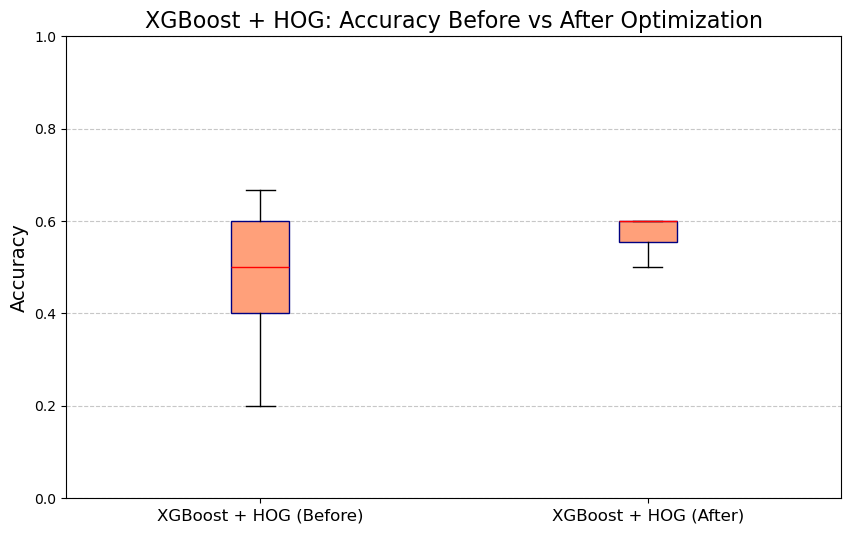

In [ ]:
import matplotlib.pyplot as plt

accuracy_data = {
    "XGBoost + HOG (Before)": [0.6, 0.4, 0.2, 0.5, 0.6666666666666666],
    "XGBoost + HOG (After)": [0.5, 0.6, 0.6, 0.6, 0.5555555555555556],
}

plt.figure(figsize=(10, 6))

plt.boxplot(
    accuracy_data.values(),
    patch_artist=True,
    boxprops=dict(facecolor='lightsalmon', color='navy'),
    medianprops=dict(color='red', linewidth=1),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black')
)

plt.xticks(range(1, len(accuracy_data) + 1), accuracy_data.keys(), fontsize=12)
plt.ylabel("Accuracy", fontsize=14)
plt.title("XGBoost + HOG: Accuracy Before vs After Optimization", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 1)

plt.show()

# Ensemble

In [ ]:
# for Ensemble

import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from skimage.feature import hog
from skimage.color import rgb2gray

# Define a function to extract HOG features from images
def extract_hog_features(image):
    # Convert image to grayscale if it's not already
    if len(image.shape) == 3:
        gray_image = rgb2gray(image)
    else:
        gray_image = image
    # Extract HOG features
    hog_features = hog(gray_image, pixels_per_cell=(10, 10), cells_per_block=(4, 4))
    return hog_features

# Initialize empty lists for descriptors and labels
X = []
y = []

# Process images for NSEP
for cropped_image in cropped_images_AR_NSEP.values():
    # Extract HOG features from each image
    hog_features = extract_hog_features(cropped_image)
    X.append(hog_features)
    y.append(0)  # NSEP label

# Process images for SEP
for cropped_image in cropped_images_AR_SEP.values():
    # Extract HOG features from each image
    hog_features = extract_hog_features(cropped_image)
    X.append(hog_features)
    y.append(1)  # SEP label

# Convert lists to numpy arrays
X_AR_HOG = np.array(X)
y_AR_HOG = np.array(y)


In [ ]:
# corrected_fetch_cdas_example.py
import numpy as np
import pandas as pd
from cdasws import CdasWs
from datetime import datetime, timedelta

# create and reuse client
cdas = CdasWs()

def extract_event_timeseries(dataset, variable, start_time, end_time, steps=72, resample_minutes=5):
    """
    Fetches a variable from CDAWeb (cdas.get_data), builds a pandas Series (time-indexed),
    resamples to `resample_minutes`, interpolates missing values, then returns a fixed-length
    numpy vector of length `steps` using linear interpolation across the resampled series.
    """
    try:
        # cdas.get_data returns something like [times_list, {variable_name: values_list}]
        result = cdas.get_data(dataset, [variable], start_time, end_time)
    except Exception as e:
        raise RuntimeError(f"cdas.get_data failed for dataset={dataset}, var={variable}: {e}")

    # result is typically a list-like: result[0] -> times, result[1] -> dict of arrays
    times = result[0]
    data_dict = result[1]
    if variable not in data_dict:
        raise RuntimeError(f"Variable {variable} not found in cdas response keys: {list(data_dict.keys())}")

    flux = np.array(data_dict[variable], dtype=float)

    # make dataframe
    df = pd.DataFrame({"time": pd.to_datetime(times), "flux": flux})
    df = df.set_index("time").sort_index()

    # Resample to regular grid (e.g. 5 minute cadence). Change resample_minutes as needed.
    df_resampled = df.resample(f"{resample_minutes}T").mean()

    # Interpolate missing values (linear), then fill any remaining NaNs with small value
    df_resampled['flux'] = df_resampled['flux'].interpolate(method='time').fillna(method='bfill').fillna(method='ffill').fillna(0.0)

    # defensive: if still empty raise
    if df_resampled['flux'].isna().all() or len(df_resampled) == 0:
        raise RuntimeError("Resampled series is empty or all-NaN.")

    # map the resampled series into a fixed-length vector (linear interpolation across indices)
    vals = df_resampled['flux'].values
    orig_idx = np.arange(len(vals))
    target_idx = np.linspace(0, len(vals) - 1, steps)
    fixed_vector = np.interp(target_idx, orig_idx, vals)

    return fixed_vector

# Example usage:
if __name__ == "__main__":
    # set your SEP windows (start_time, end_time) in ISO format (Z at end)
    sep_windows = [
        ("2012-03-07T00:00:00Z", "2012-03-07T06:00:00Z"),  # example big SEP
        # add more (start, end) tuples here...
    ]

    dataset = "GOES13_EPAM_LEHT_5MIN"   # <- might need to adjust to the correct dataset name for your GOES data
    variable = "P8_PTC"                 # <- the name of the >100 MeV channel in that dataset; may differ

    sep_rows = []
    for start, end in sep_windows:
        try:
            vec = extract_event_timeseries(dataset, variable, start, end, steps=72, resample_minutes=5)
            sep_rows.append(vec)
            print(f"Fetched and processed: {start} -> {end}")
        except Exception as e:
            print(f"Skipped {start} -> {end}: {e}")

    SEP_df = pd.DataFrame(sep_rows)
    SEP_df.to_csv("SEP_data_100MeV_Uni.csv", index=False)
    print("Saved SEP_data_100MeV_Uni.csv shape=", SEP_df.shape)


Skipped 2012-03-07T00:00:00Z -> 2012-03-07T06:00:00Z: argument of type 'NoneType' is not iterable
Saved SEP_data_100MeV_Uni.csv shape= (0, 0)
